# Attack Type Prediction Using Decision Tree, KNN, ANN and K-Means

## Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import export_graphviz
from IPython.display import SVG, display
import graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [3]:
!pip install graphviz

In [4]:
dataset = pd.read_csv('Dataset.txt', sep=',')

In [5]:
attack_types = pd.read_csv('Attack_types.txt', sep=' ')

In [6]:
dataset.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack_category  occurance  
0           normal         20  
1           normal         15  
2          neptune         19  
3           normal         21  
4           normal         21  

[5 rows x 43 columns]

In [7]:
dataset.tail()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
125968               0       0    0  ...                    0.10   
125969               0       0    0  ...                    0.96   
125970               0       0    0  ...                    0.12   
125971               0       0    0  ...                    0.03   
125972               0       0    0  ...                    0.30   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
125968                    0.06                         0.00   
125969                    0.01                         0.01   
125970                    0.06                         0.00   
125971                    0.05                         0.00   
125972                    0.03                         0.30   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
125968                          0.0                  1.00   
125969                          0.0                  0.00   
125970                          0.0                  0.72   
125971                          0.0                  1.00   
125972                          0.0                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
125968                       1.0                  0.00   
125969                       0.0                  0.00   
125970                       0.0                  0.01   
125971                       1.0                  0.00   
125972                       0.0                  0.00   

        dst_host_srv_rerror_rate  attack_category  occurance  
125968                       0.0          neptune         20  
125969                       0.0           normal         21  
125970                       0.0           normal         18  
125971                       0.0          neptune         20  
125972                       0.0           normal         21  

[5 rows x 43 columns]

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [9]:
dataset.describe()

duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_srv_count  \
count  125973.000000    125973.000000  ...       125973.000000   
mean        0.395736         0.279250  ...          115.653005   
std         0.489010        23.942042  ...          110.702741   
min         0.000000         0.000000  ...            0.000000   
25%         0.000000         0.000000  ...           10.000000   
50%         0.000000         0.000000  ...           63.000000   
75%         1.000000         0.000000  ...          255.000000   
max         1.000000      7479.000000  ...          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count           125973.000000           125973.000000   
mean                 0.521242                0.082951   
std                  0.448949                0.188922   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125973.000000                125973.000000   
mean                      0.148379                     0.032542   
std                       0.308997                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125973.000000             125973.000000         125973.000000   
mean               0.284452                  0.278485              0.118832   
std                0.444784                  0.445669              0.306557   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate      occurance  
count             125973.000000  125973.000000  
mean                   0.120240      19.504060  
std                    0.319459       2.291503  
min                    0.000000       0.000000  
25%                    0.000000      18.000000  
50%                    0.00000

In [10]:
attack_types.head()

attack_category attack_type
0         apache2         dos
1            back         dos
2        mailbomb         dos
3    processtable         dos
4   snmpgetattack         dos

In [11]:
attack_types.tail()

attack_category attack_type
36       portsweep       probe
37           satan       probe
38           mscan       probe
39           saint       probe
40            worm       probe

In [12]:
attack_types.describe()

attack_category attack_type
count               41          41
unique              39           4
top               imap         r2l
freq                 2          15

In [13]:
attack_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   attack_category  41 non-null     object
 1   attack_type      41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes


## Data Visualization

In [14]:
# Add a Target Column (Attack Type in the Data Set)
attack_types_dict = attack_types.set_index('attack_category')['attack_type'].to_dict()
target_column_list = []
for attack_category in dataset['attack_category']:
    if (attack_category == 'normal'):
        target_column_list.append('normal')
    else:
        target_column_list.append(attack_types_dict[attack_category])

dataset['attack_type'] = target_column_list

In [15]:
dataset.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.03   
1               0       0    0  ...                    0.60   
2               0       0    0  ...                    0.05   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  attack_category  occurance  attack_type  
0                      0.00           normal         20       normal  
1                      0.00           normal         15       normal  
2                      0.00          neptune         19          dos  
3                      0.01           normal         21       normal  
4                      0.00           normal         21       normal  

[5 rows x 44 columns]

In [16]:
dataset.tail()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
125968               0       0    0  ...                    0.06   
125969               0       0    0  ...                    0.01   
125970               0       0    0  ...                    0.06   
125971               0       0    0  ...                    0.05   
125972               0       0    0  ...                    0.03   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
125968                         0.00                          0.0   
125969                         0.01                          0.0   
125970                         0.00                          0.0   
125971                         0.00                          0.0   
125972                         0.30                          0.0   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
125968                  1.00                       1.0                  0.00   
125969                  0.00                       0.0                  0.00   
125970                  0.72                       0.0                  0.01   
125971                  1.00                       1.0                  0.00   
125972                  0.00                       0.0                  0.00   

        dst_host_srv_rerror_rate  attack_category  occurance  attack_type  
125968                       0.0          neptune         20          dos  
125969                       0.0           normal         21       normal  
125970                       0.0           normal         18       normal  
125971                       0.0          neptune         20          dos  
125972                       0.0           normal         21       normal  

[5 rows x 44 columns]

In [17]:
attack_types.head()

attack_category attack_type
0         apache2         dos
1            back         dos
2        mailbomb         dos
3    processtable         dos
4   snmpgetattack         dos

In [18]:
attack_types.tail()

attack_category attack_type
36       portsweep       probe
37           satan       probe
38           mscan       probe
39           saint       probe
40            worm       probe

In [19]:
attack_types_count = dataset['attack_type'].value_counts()

In [20]:
colors = ['red', 'blue', 'green', 'orange']

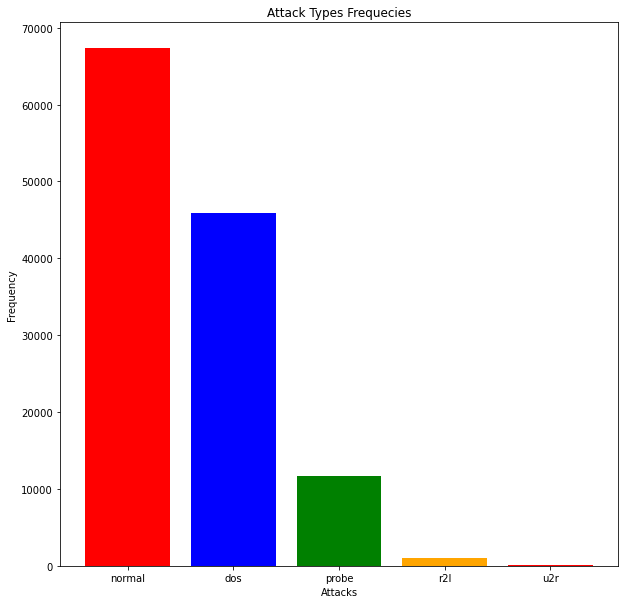

In [21]:
fig = plt.figure(figsize=(10,10))
plt.bar(attack_types_count.index, attack_types_count.values, color=colors)

plt.title('Attack Types Frequecies')
plt.xlabel('Attacks')
plt.ylabel('Frequency')

# save the figure as PNG Image
fig.savefig('attack_types_frequencies')

### Inference:
1. The graph shows that **normal** has the highest frequency that mean there are no attacks normally.
2. Second **dos** attack has the highest frequency.
3. Third **probe** attack has the highest freuqecny.

In [22]:
attack_categories_count = dataset['attack_category'].value_counts()

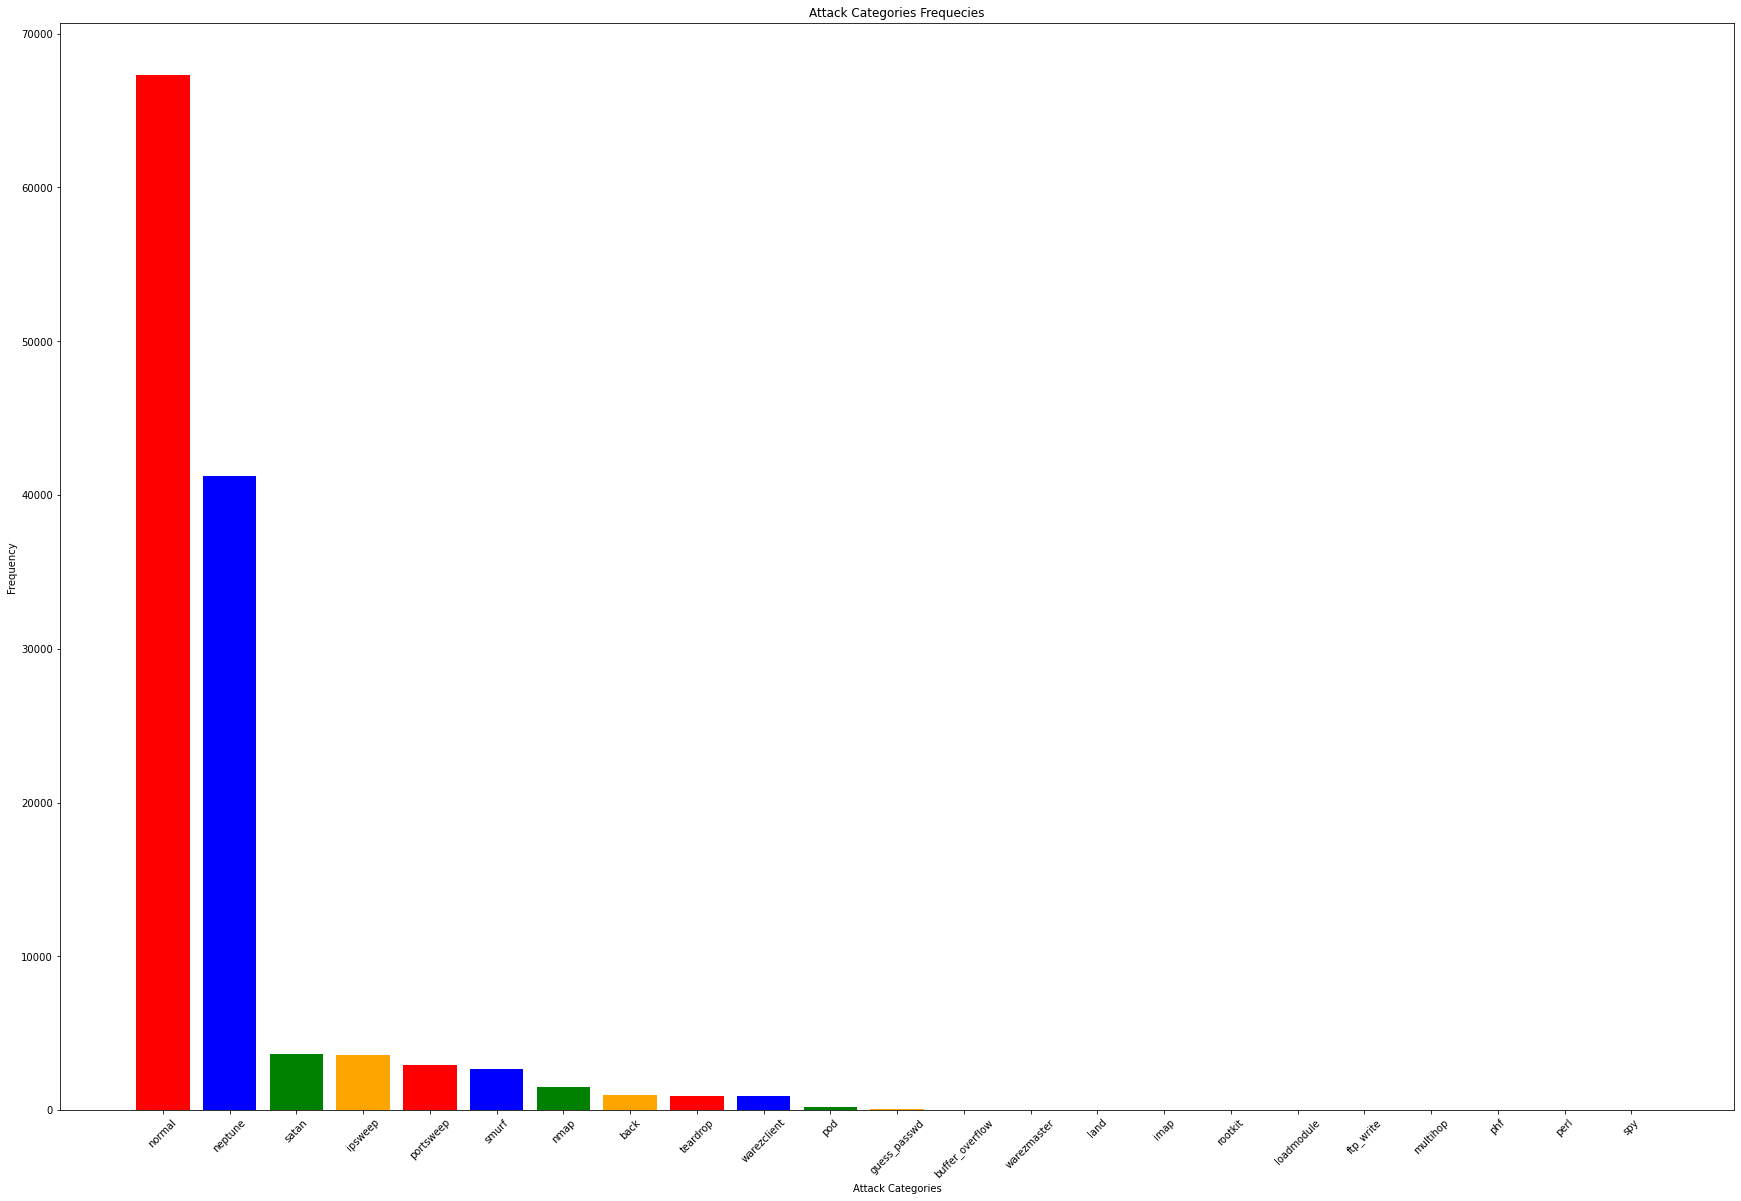

In [23]:
fig = plt.figure(figsize=(30,20))
plt.bar(attack_categories_count.index, attack_categories_count.values, color=colors)

plt.title('Attack Categories Frequecies')
plt.xlabel('Attack Categories')
plt.ylabel('Frequency')

plt.xticks(rotation=45)
# save the figure as PNG Image
fig.savefig('attack_categories_frequencies')


### Inference:
1. The graph shows that normal attack category has the highest frequency.
2. Second **neptune** has the highest frequency that correspond the **dos** attack.
3. Third **satan** has the highest frequency that correspond to the **probe** attack.

## Label Encoding the Categorical Columns

In [24]:
dataset.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.03   
1               0       0    0  ...                    0.60   
2               0       0    0  ...                    0.05   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  attack_category  occurance  attack_type  
0                      0.00           normal         20       normal  
1                      0.00           normal         15       normal  
2                      0.00          neptune         19          dos  
3                      0.01           normal         21       normal  
4                      0.00           normal         21       normal  

[5 rows x 44 columns]

In [25]:
categorical_cols = ['protocol_type', 'service', 'flag', 'attack_category', 'attack_type']

In [26]:
label_encoder = LabelEncoder()
for category_col in categorical_cols:
    dataset[category_col] = label_encoder.fit_transform(dataset[category_col])

In [27]:
dataset.head()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.03   
1               0       0    0  ...                    0.60   
2               0       0    0  ...                    0.05   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  attack_category  occurance  attack_type  
0                      0.00               11         20            1  
1                      0.00               11         15            1  
2                      0.00                9         19            0  
3                      0.01               11         21            1  
4                      0.00               11         21            1  

[5 rows x 44 columns]

### Correlation Matrix For Selecting Five Best Features

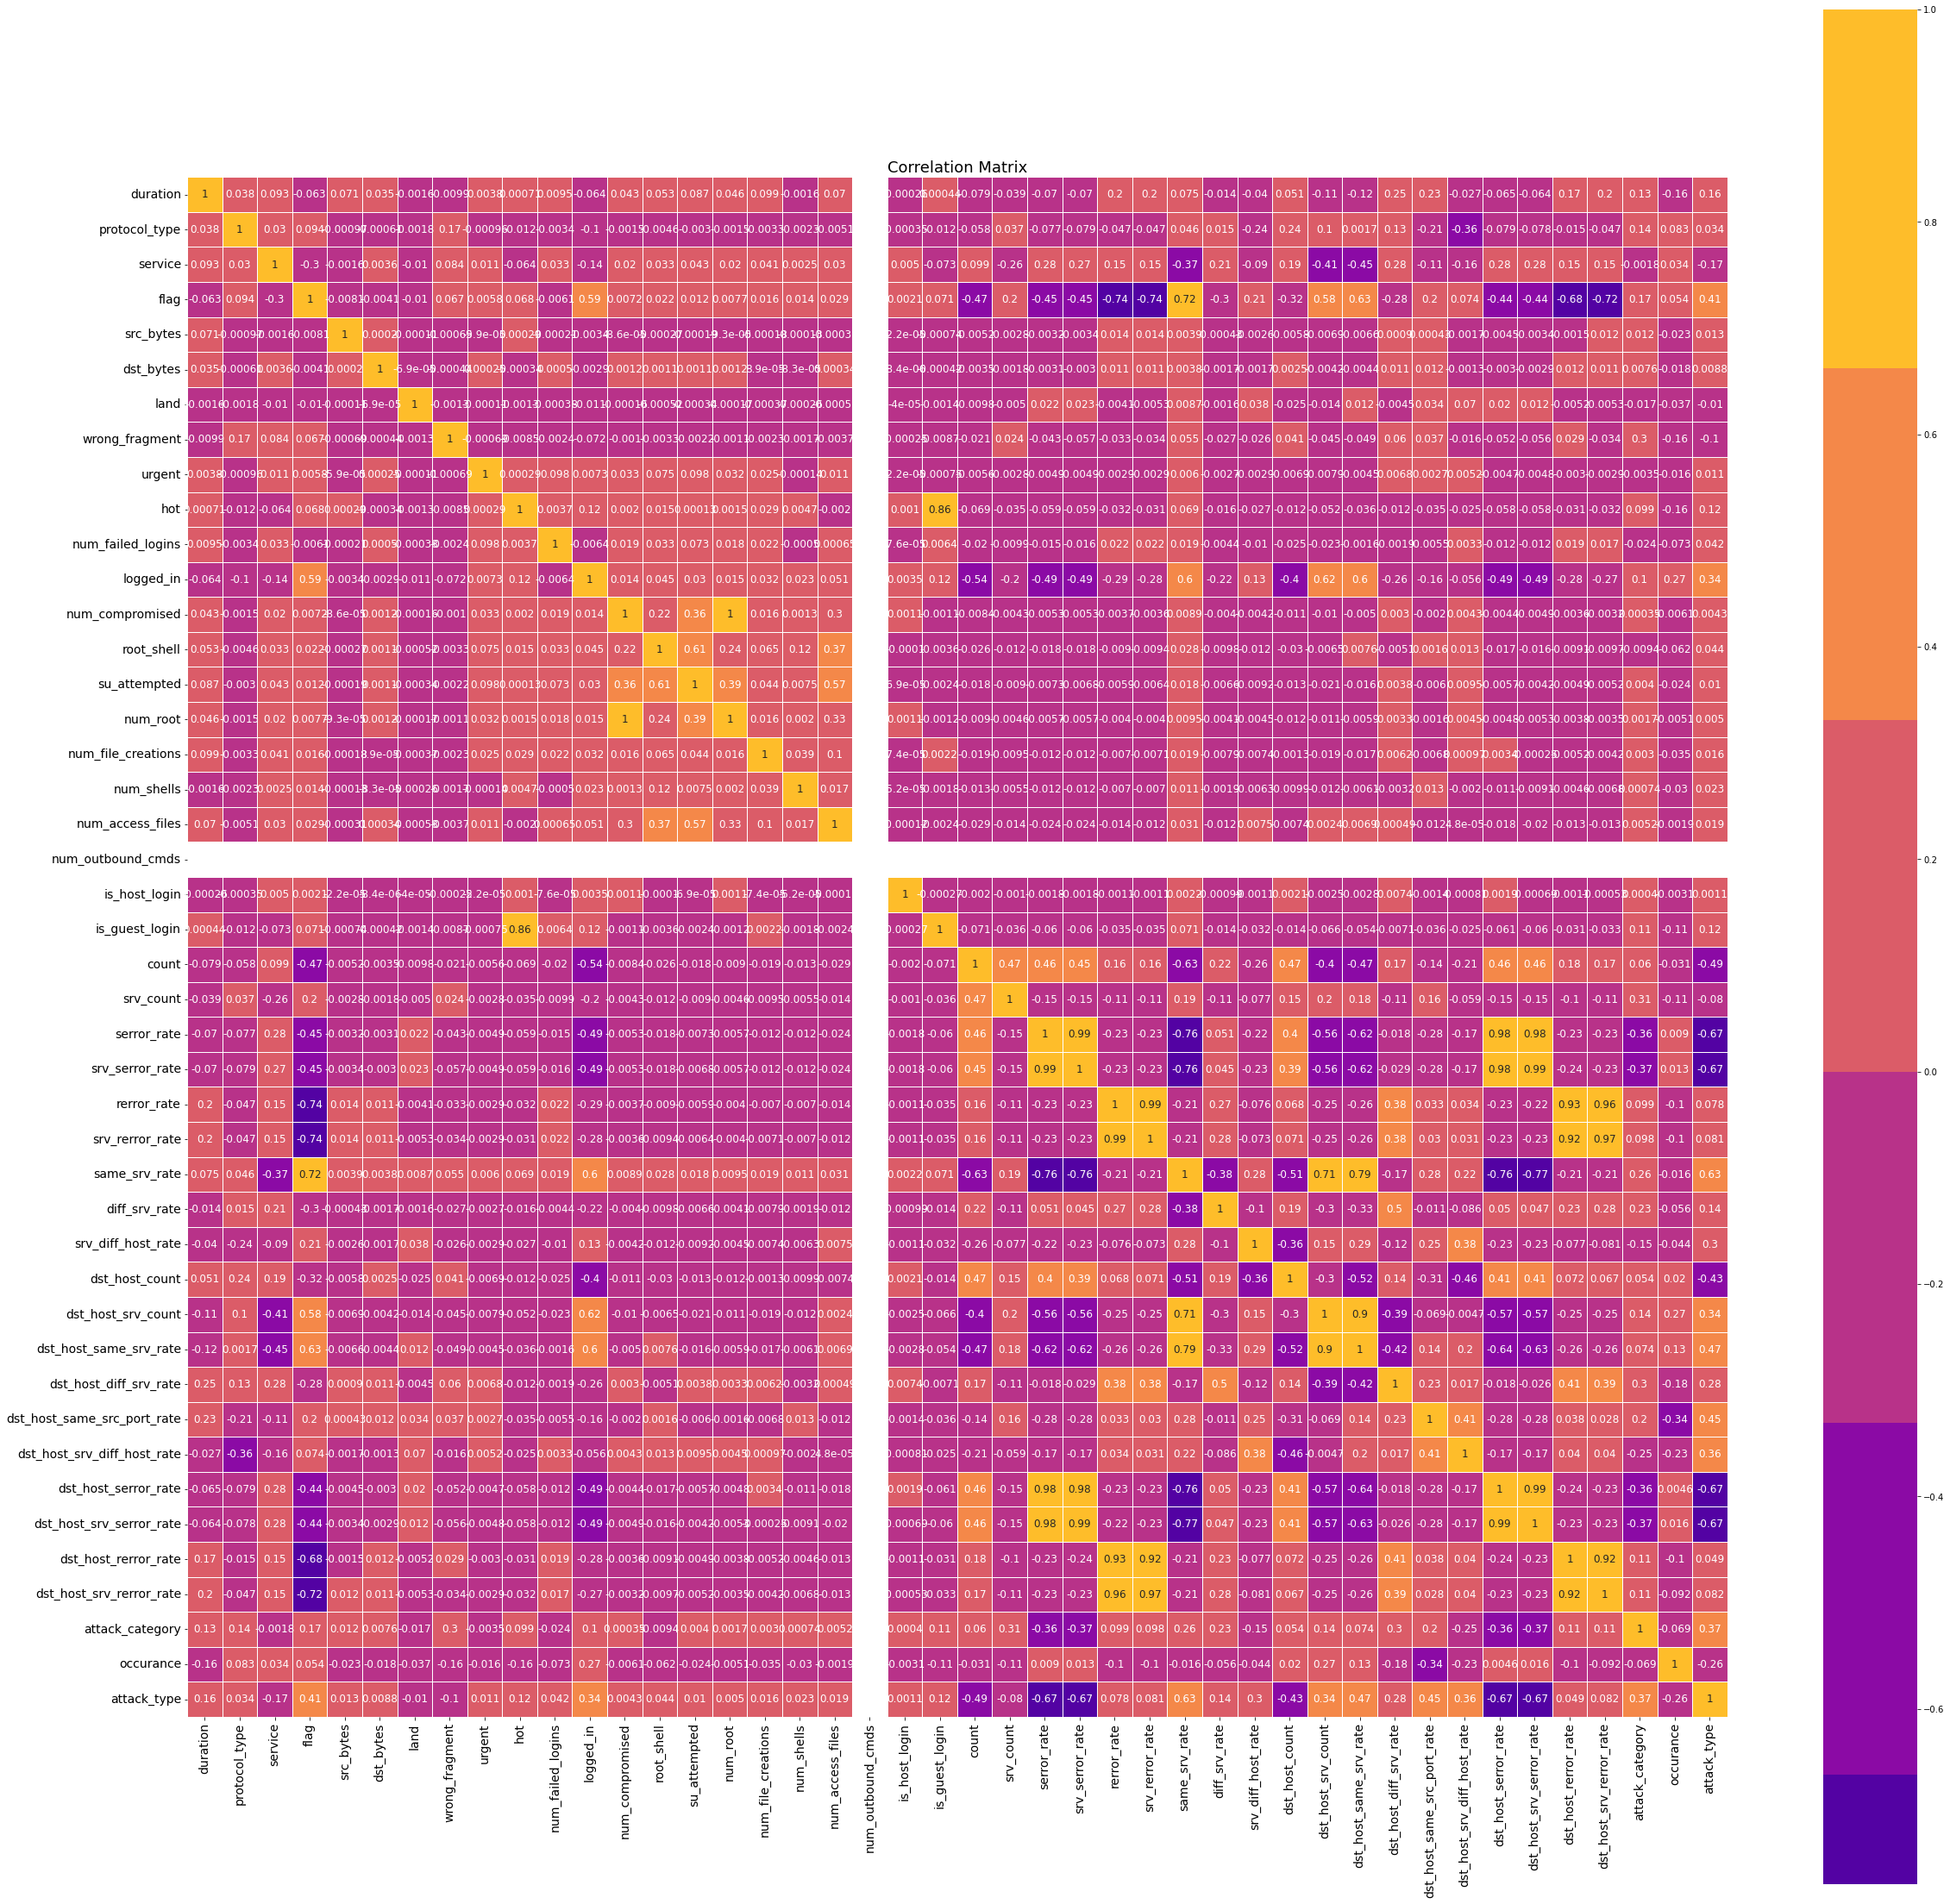

In [28]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(40, 40))
cmap = sns.color_palette("plasma")
sns.heatmap(corr_matrix, cmap=cmap, center=0, square=True, annot=True, annot_kws={'fontsize': 12}, linewidths=.5, ax=ax)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Correlation Matrix', fontsize=18)
fig.savefig('correlation_matrix_of_dataset.png', dpi=300, bbox_inches='tight')
plt.show()

### Inference:
1. The graph shows that **attack_type** is highly correlated with **serror_rate** with r = -0.67 negatively correlated.
2. The graph shows that **attack_type** is highly correlated with **flag** with r = 0.41 positively correlated.
3. The feature 'serror_rate' is higly correlated with 'dst_host_srv_rerror_rate' with r = 0.98 highly positively correlated and with the target column 'serror_rate' r = -0.67 and 'dst_host_srv_rerror_rate' has the
r = 0.0082 that mean we will select 'serror_rate' as compared to dst_host_srv_rerror_rate becuase both are higly correlated with each other but with the target column serror_rate is more highly correlated. 

In [29]:
corr_matrix = dataset.corr()
corr_target = corr_matrix['attack_type']
top_5_cols = corr_target.abs().sort_values(ascending=False)[1:6]
if 'attack_type' in top_5_cols:
    top_5_cols = top_5_cols.drop(target_var)
top_5_cols_using_corr = top_5_cols.index.tolist()
top_5_cols_using_corr

['dst_host_srv_serror_rate',
 'dst_host_serror_rate',
 'srv_serror_rate',
 'serror_rate',
 'same_srv_rate']

In [30]:
best_feautres_using_corr = dataset[top_5_cols_using_corr]

In [31]:
best_feautres_using_corr.head()

dst_host_srv_serror_rate  dst_host_serror_rate  srv_serror_rate  \
0                      0.00                  0.00              0.0   
1                      0.00                  0.00              0.0   
2                      1.00                  1.00              1.0   
3                      0.01                  0.03              0.2   
4                      0.00                  0.00              0.0   

   serror_rate  same_srv_rate  
0          0.0           1.00  
1          0.0           0.08  
2          1.0           0.05  
3          0.2           1.00  
4          0.0           1.00

In [32]:
best_feautres_using_corr.describe()

dst_host_srv_serror_rate  dst_host_serror_rate  srv_serror_rate  \
count             125973.000000         125973.000000    125973.000000   
mean                   0.278485              0.284452         0.282485   
std                    0.445669              0.444784         0.447022   
min                    0.000000              0.000000         0.000000   
25%                    0.000000              0.000000         0.000000   
50%                    0.000000              0.000000         0.000000   
75%                    1.000000              1.000000         1.000000   
max                    1.000000              1.000000         1.000000   

         serror_rate  same_srv_rate  
count  125973.000000  125973.000000  
mean        0.284485       0.660928  
std         0.446456       0.439623  
min         0.000000       0.000000  
25%         0.000000       0.090000  
50%         0.000000       1.000000  
75%         1.000000       1.000000  
max         1.000000       1.000000

In [33]:
best_feautres_using_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   dst_host_srv_serror_rate  125973 non-null  float64
 1   dst_host_serror_rate      125973 non-null  float64
 2   srv_serror_rate           125973 non-null  float64
 3   serror_rate               125973 non-null  float64
 4   same_srv_rate             125973 non-null  float64
dtypes: float64(5)
memory usage: 4.8 MB


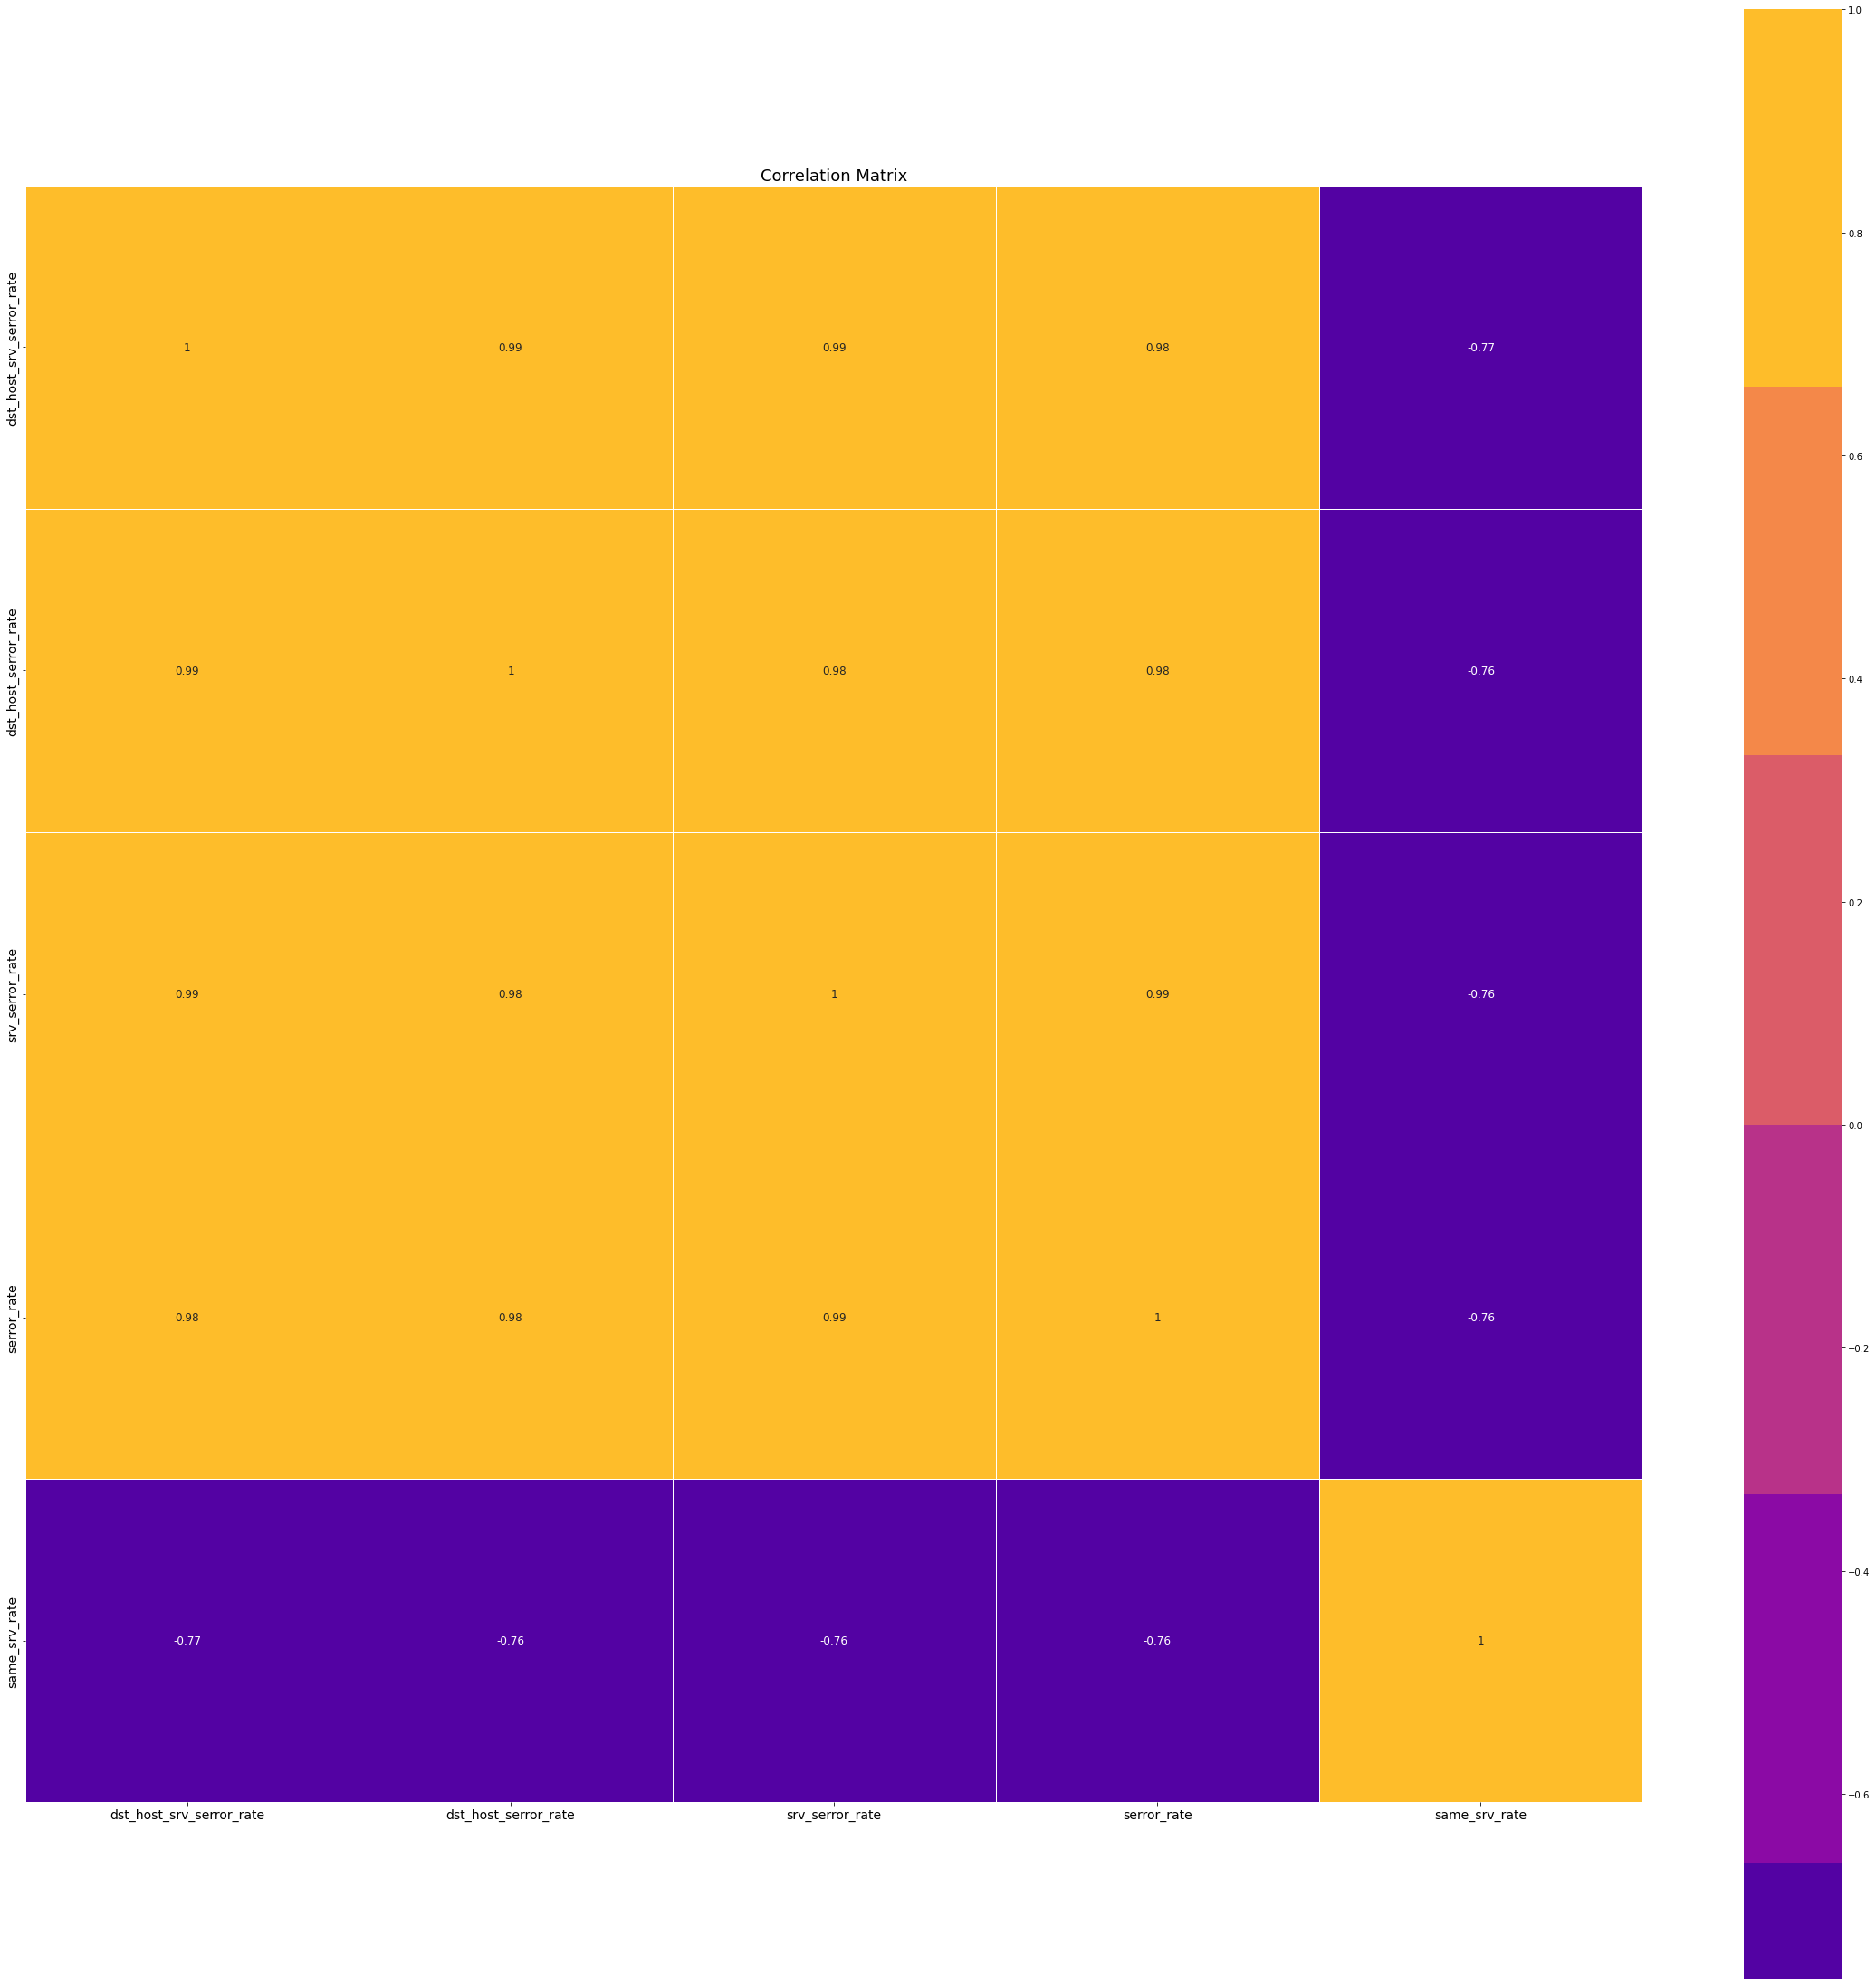

In [34]:
corr_matrix = best_feautres_using_corr.corr()
fig, ax = plt.subplots(figsize=(40, 40))
cmap = sns.color_palette("plasma")
sns.heatmap(corr_matrix, cmap=cmap, center=0, square=True, annot=True, annot_kws={'fontsize': 12}, linewidths=.5, ax=ax)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Correlation Matrix', fontsize=18)
fig.savefig('correlation_matrix_of_features_selected_using_corr.png', dpi=300, bbox_inches='tight')
plt.show()

## Applying Decision Tree Model On Features Selected Using Corr Matrix
### 1. Entropy Criteria

#### Split the Data Set into traning and testing dataset

In [35]:
X = best_feautres_using_corr
y = dataset['attack_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(100778, 5)

In [37]:
X_test.shape

(25195, 5)

In [38]:
y_train.shape

(100778,)

In [39]:
y_test.shape

(25195,)

In [40]:
y_test.head()

378      1
32038    0
86399    0
74412    0
52951    2
Name: attack_type, dtype: int64

In [41]:
y_train.head()

95141    1
37486    0
34926    0
34589    1
11420    1
Name: attack_type, dtype: int64

In [42]:
X_train.head()

dst_host_srv_serror_rate  dst_host_serror_rate  srv_serror_rate  \
95141                       0.0                   0.0              0.0   
37486                       1.0                   1.0              1.0   
34926                       0.0                   0.0              0.0   
34589                       0.0                   0.0              0.0   
11420                       0.0                   0.0              0.0   

       serror_rate  same_srv_rate  
95141          0.0           1.00  
37486          1.0           0.01  
34926          0.0           0.03  
34589          0.0           1.00  
11420          0.0           1.00

In [43]:
X_test.head()

dst_host_srv_serror_rate  dst_host_serror_rate  srv_serror_rate  \
378                         0.0                  0.00              0.0   
32038                       1.0                  1.00              1.0   
86399                       1.0                  1.00              1.0   
74412                       0.0                  0.00              0.0   
52951                       0.0                  0.04              0.0   

       serror_rate  same_srv_rate  
378            0.0           1.00  
32038          1.0           0.26  
86399          1.0           0.07  
74412          0.0           0.07  
52951          0.0           1.00

In [44]:
X_test.tail()

dst_host_srv_serror_rate  dst_host_serror_rate  srv_serror_rate  \
114267                      0.00                  0.00              0.0   
69047                       0.00                  0.00              0.0   
56135                       0.00                  0.00              0.0   
103927                      0.02                  0.02              0.0   
33190                       1.00                  1.00              1.0   

        serror_rate  same_srv_rate  
114267          0.0            1.0  
69047           0.0            1.0  
56135           0.0            1.0  
103927          0.0            1.0  
33190           1.0            0.1

In [45]:
X_train.describe()

dst_host_srv_serror_rate  dst_host_serror_rate  srv_serror_rate  \
count             100778.000000         100778.000000    100778.000000   
mean                   0.278298              0.284417         0.282333   
std                    0.445590              0.444807         0.446940   
min                    0.000000              0.000000         0.000000   
25%                    0.000000              0.000000         0.000000   
50%                    0.000000              0.000000         0.000000   
75%                    1.000000              1.000000         1.000000   
max                    1.000000              1.000000         1.000000   

         serror_rate  same_srv_rate  
count  100778.000000  100778.000000  
mean        0.284440       0.660844  
std         0.446421       0.439646  
min         0.000000       0.000000  
25%         0.000000       0.090000  
50%         0.000000       1.000000  
75%         1.000000       1.000000  
max         1.000000       1.000000

In [46]:
X_test.describe()

dst_host_srv_serror_rate  dst_host_serror_rate  srv_serror_rate  \
count              25195.000000          25195.000000     25195.000000   
mean                   0.279232              0.284594         0.283095   
std                    0.445993              0.444702         0.447359   
min                    0.000000              0.000000         0.000000   
25%                    0.000000              0.000000         0.000000   
50%                    0.000000              0.000000         0.000000   
75%                    1.000000              1.000000         1.000000   
max                    1.000000              1.000000         1.000000   

        serror_rate  same_srv_rate  
count  25195.000000   25195.000000  
mean       0.284662       0.661262  
std        0.446602       0.439539  
min        0.000000       0.000000  
25%        0.000000       0.090000  
50%        0.000000       1.000000  
75%        1.000000       1.000000  
max        1.000000       1.000000

In [47]:
clf_using_corr_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_using_corr_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [48]:
y_pred = clf_using_corr_entropy.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.8805715419726136


### Confusion Matrix

F1 Score: 0.8622577711672988
Accuracy: 0.8805715419726136
Error Rate: 0.11942845802738644


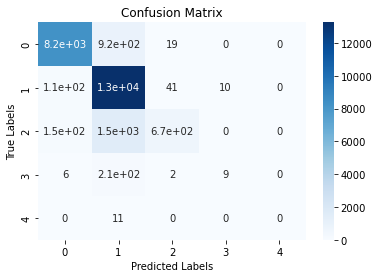

In [50]:
cm = confusion_matrix(y_test, y_pred)
# calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate error rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.savefig("cm_dt_corr_entropy.png")
plt.show() 

### Inference: 

1. The diagnol shows correctly predicted values. The attack is actually 0 and the model also predicted it as 0 same goes for all the diagnol values like second rows diagnol true value is 1 predicted value is also 1.
2. The confusion matrix shows that 8.2e + 03 values are predicted correctely True value is 0 and the predicted value is also 0.
3. Second row first column shows that 1.1e+02 values are predicted wrong True value is 1 but model predicted it as 0.
4. Same goes for all the confusion matrix.

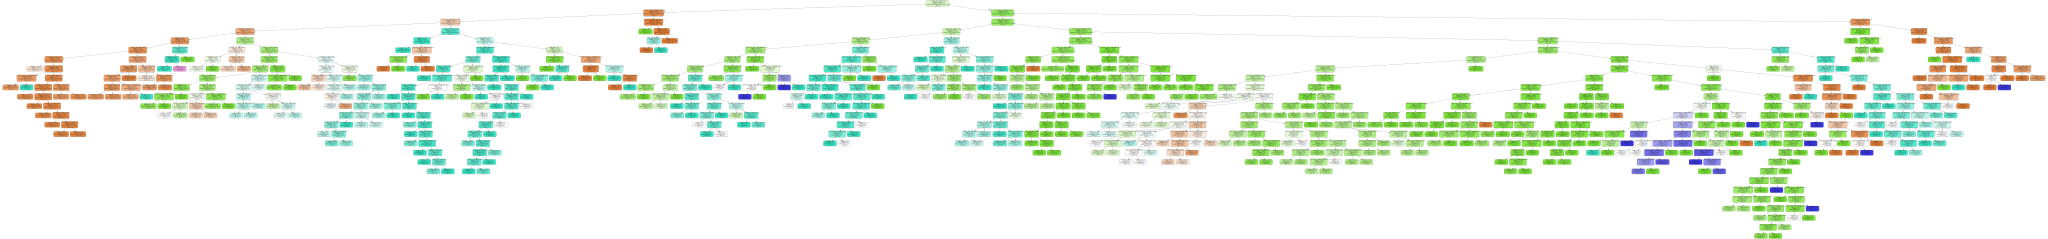

In [51]:
# Visualize the decision tree
dot_data = export_graphviz(clf_using_corr_entropy, out_file=None, 
                           feature_names=top_5_cols_using_corr,  
                           class_names='attack_type',  
                           filled=True, rounded=True,  
                           special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("iris_decision_tree")
graph = graphviz.Source(dot_data)
display(SVG(graph.pipe(format='svg')))

### 2.Gini Criteria 

In [52]:
X = best_feautres_using_corr
y = dataset['attack_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
clf_corr_using_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_corr_using_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
y_pred = clf_corr_using_gini.predict(X_test)

F1 Score: 0.8623194516628205
Accuracy: 0.8806112323873785
Error Rate: 0.11938876761262152


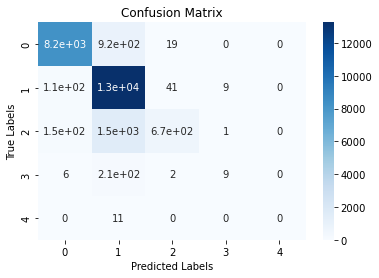

In [55]:
# calculate F1 score
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate error rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("cm_dt_corr_gini.png")
plt.show()

### Inference: 

1. The diagnol shows correctly predicted values. The attack is actually 0 and the model also predicted it as 0 same goes for all the diagnol values like second rows diagnol true value is 1 predicted value is also 1.
2. The confusion matrix shows that 8.2e + 03 values are predicted correctely True value is 0 and the predicted value is also 0.
3. Second row first column shows that 1.1e+02 values are predicted wrong True value is 1 but model predicted it as 0.
4. Same goes for all the confusion matrix.

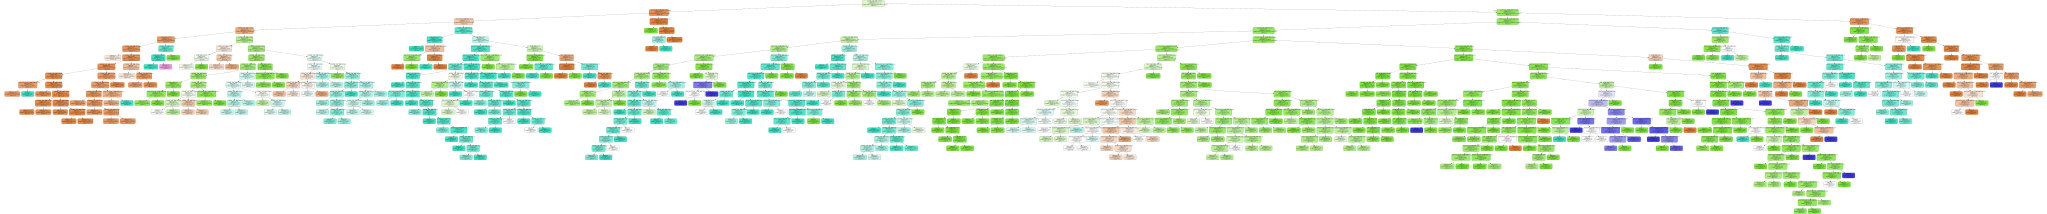

In [56]:
# Visualize the decision tree
dot_data = export_graphviz(clf_corr_using_gini, out_file=None, 
                           feature_names=top_5_cols_using_corr,  
                           class_names='attack_type',  
                           filled=True, rounded=True,  
                           special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("iris_decision_tree")
graph = graphviz.Source(dot_data)
display(SVG(graph.pipe(format='svg')))

## Features Selection Using Information Gain 

In [57]:
# extract the features and target variable
X = dataset.drop('attack_type', axis=1)
y = dataset['attack_type']

# calculate the information gain of each feature
info_gain = mutual_info_classif(X, y)

# create a dataframe to store the information gain of each feature
ig_df = pd.DataFrame({'feature': X.columns, 'info_gain': info_gain})

# sort the dataframe by information gain in descending order
ig_df = ig_df.sort_values(by='info_gain', ascending=False)

# select the top five features based on information gain
top_5_cols_using_ig = list(ig_df['feature'][:5])
print("Top 5 features based on Information Gain:", top_5_cols_using_ig)

Top 5 features based on Information Gain: ['attack_category', 'src_bytes', 'service', 'diff_srv_rate', 'flag']


In [58]:
best_features_using_ig = dataset[top_5_cols_using_ig]

In [59]:
best_features_using_ig.head()

attack_category  src_bytes  service  diff_srv_rate  flag
0               11        491       20           0.00     9
1               11        146       44           0.15     9
2                9          0       49           0.07     5
3               11        232       24           0.00     9
4               11        199       24           0.00     9

In [60]:
best_features_using_ig.tail()

attack_category  src_bytes  service  diff_srv_rate  flag
125968                9          0       49           0.06     5
125969               11        105       49           0.00     9
125970               11       2231       54           0.00     9
125971                9          0       30           0.05     5
125972               11        151       20           0.00     9

In [61]:
best_features_using_ig.describe()

attack_category     src_bytes        service  diff_srv_rate  \
count    125973.000000  1.259730e+05  125973.000000  125973.000000   
mean         10.625483  4.556674e+04      31.226469       0.063053   
std           2.636084  5.870331e+06      16.346470       0.180314   
min           0.000000  0.000000e+00       0.000000       0.000000   
25%           9.000000  0.000000e+00      20.000000       0.000000   
50%          11.000000  4.400000e+01      24.000000       0.000000   
75%          11.000000  2.760000e+02      49.000000       0.060000   
max          22.000000  1.379964e+09      69.000000       1.000000   

                flag  
count  125973.000000  
mean        6.979996  
std         2.689365  
min         0.000000  
25%         5.000000  
50%         9.000000  
75%         9.000000  
max        10.000000

In [62]:
best_features_using_ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   attack_category  125973 non-null  int64  
 1   src_bytes        125973 non-null  int64  
 2   service          125973 non-null  int64  
 3   diff_srv_rate    125973 non-null  float64
 4   flag             125973 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 4.8 MB


In [63]:
best_features_using_ig.shape

(125973, 5)

## Applying Decision Tree Model Entropy Criteria

In [64]:
X = best_features_using_ig
y = dataset['attack_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train.shape

(100778, 5)

In [66]:
X_test.shape

(25195, 5)

In [67]:
y_train.shape

(100778,)

In [68]:
y_test.shape

(25195,)

In [69]:
X_train.head()

attack_category  src_bytes  service  diff_srv_rate  flag
95141               11        214       24           0.00     9
37486                9          0       49           0.06     5
34926                9          0       24           0.06     1
34589               11        257       24           0.00     9
11420               11        516       44           0.00     9

In [70]:
X_test.head()

attack_category  src_bytes  service  diff_srv_rate  flag
378                 11         36       12           0.00     9
32038                9          0       24           0.10     5
86399                9          0       47           0.06     5
74412                9          0       49           0.06     1
52951               15          0       49           0.00     4

### Decision Tree Entropy Criteria

In [71]:
clf_using_ig_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_using_ig_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

#### Confusion Matrix

In [72]:
y_pred = clf_using_ig_entropy.predict(X_test)

F1 Score: 0.9998534368369423
Accuracy: 0.9998412383409406
Error Rate: 0.0001587616590593699


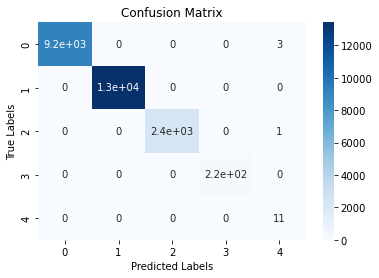

In [73]:
# calculate F1 score
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate error rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("cm_dt_ig_entropy.png")
plt.show()

### Inference:
1. The Confusion matrix shows that there are only 4 values that are predicted wrong.
2. Third row 5th column has a value 1 that shows that True value is 2 but the model predicted it as 4.
3. Frist row 5th column has a value 3 that shows that True value is 3 but the model predicted it as 4.


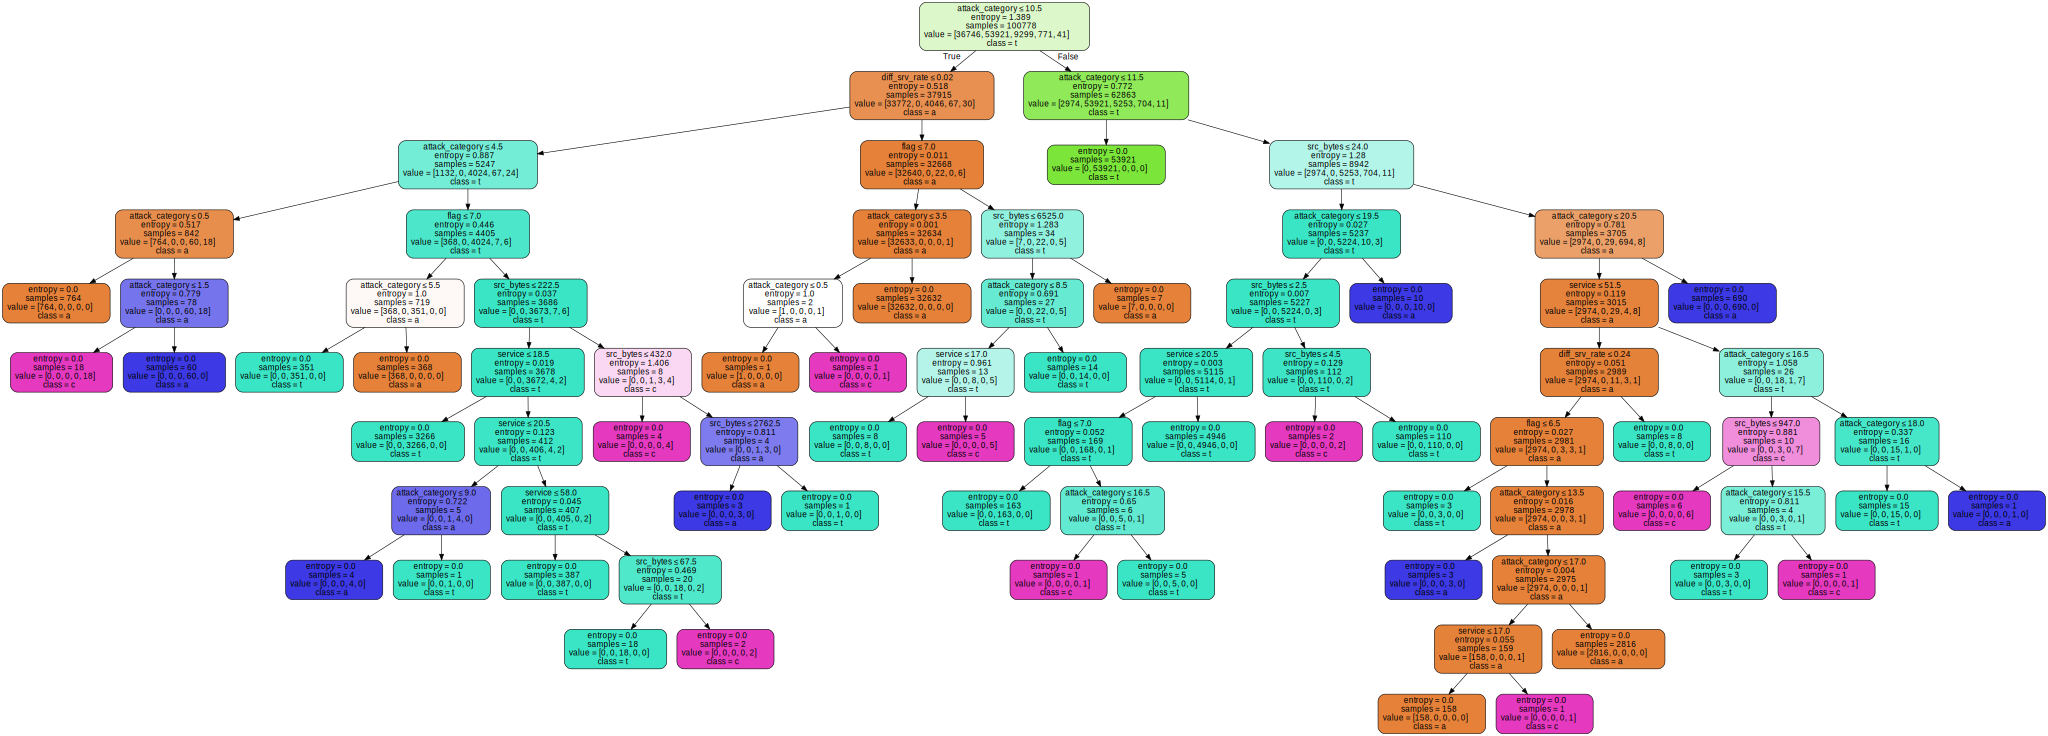

In [74]:
# Visualize the decision tree
dot_data = export_graphviz(clf_using_ig_entropy, out_file=None, 
                           feature_names=top_5_cols_using_ig,  
                           class_names='attack_type',  
                           filled=True, rounded=True,  
                           special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("iris_decision_tree")
graph = graphviz.Source(dot_data)
display(SVG(graph.pipe(format='svg')))

### Decision Tree Using Gini Criteria

In [75]:
X = best_features_using_ig
y = dataset['attack_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
clf_using_ig_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_using_ig_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Confusion Matrix

In [77]:
y_pred = clf_using_ig_gini.predict(X_test)

F1 Score: 0.9998534368369423
Accuracy: 0.9998412383409406
Error Rate: 0.0001587616590593699


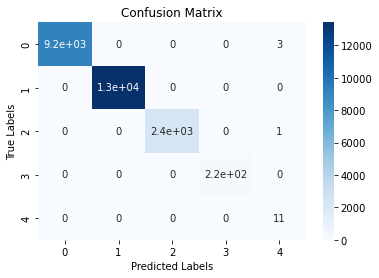

In [78]:
# calculate F1 score
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate error rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("cm_dt_ig_gini.png")
plt.show()

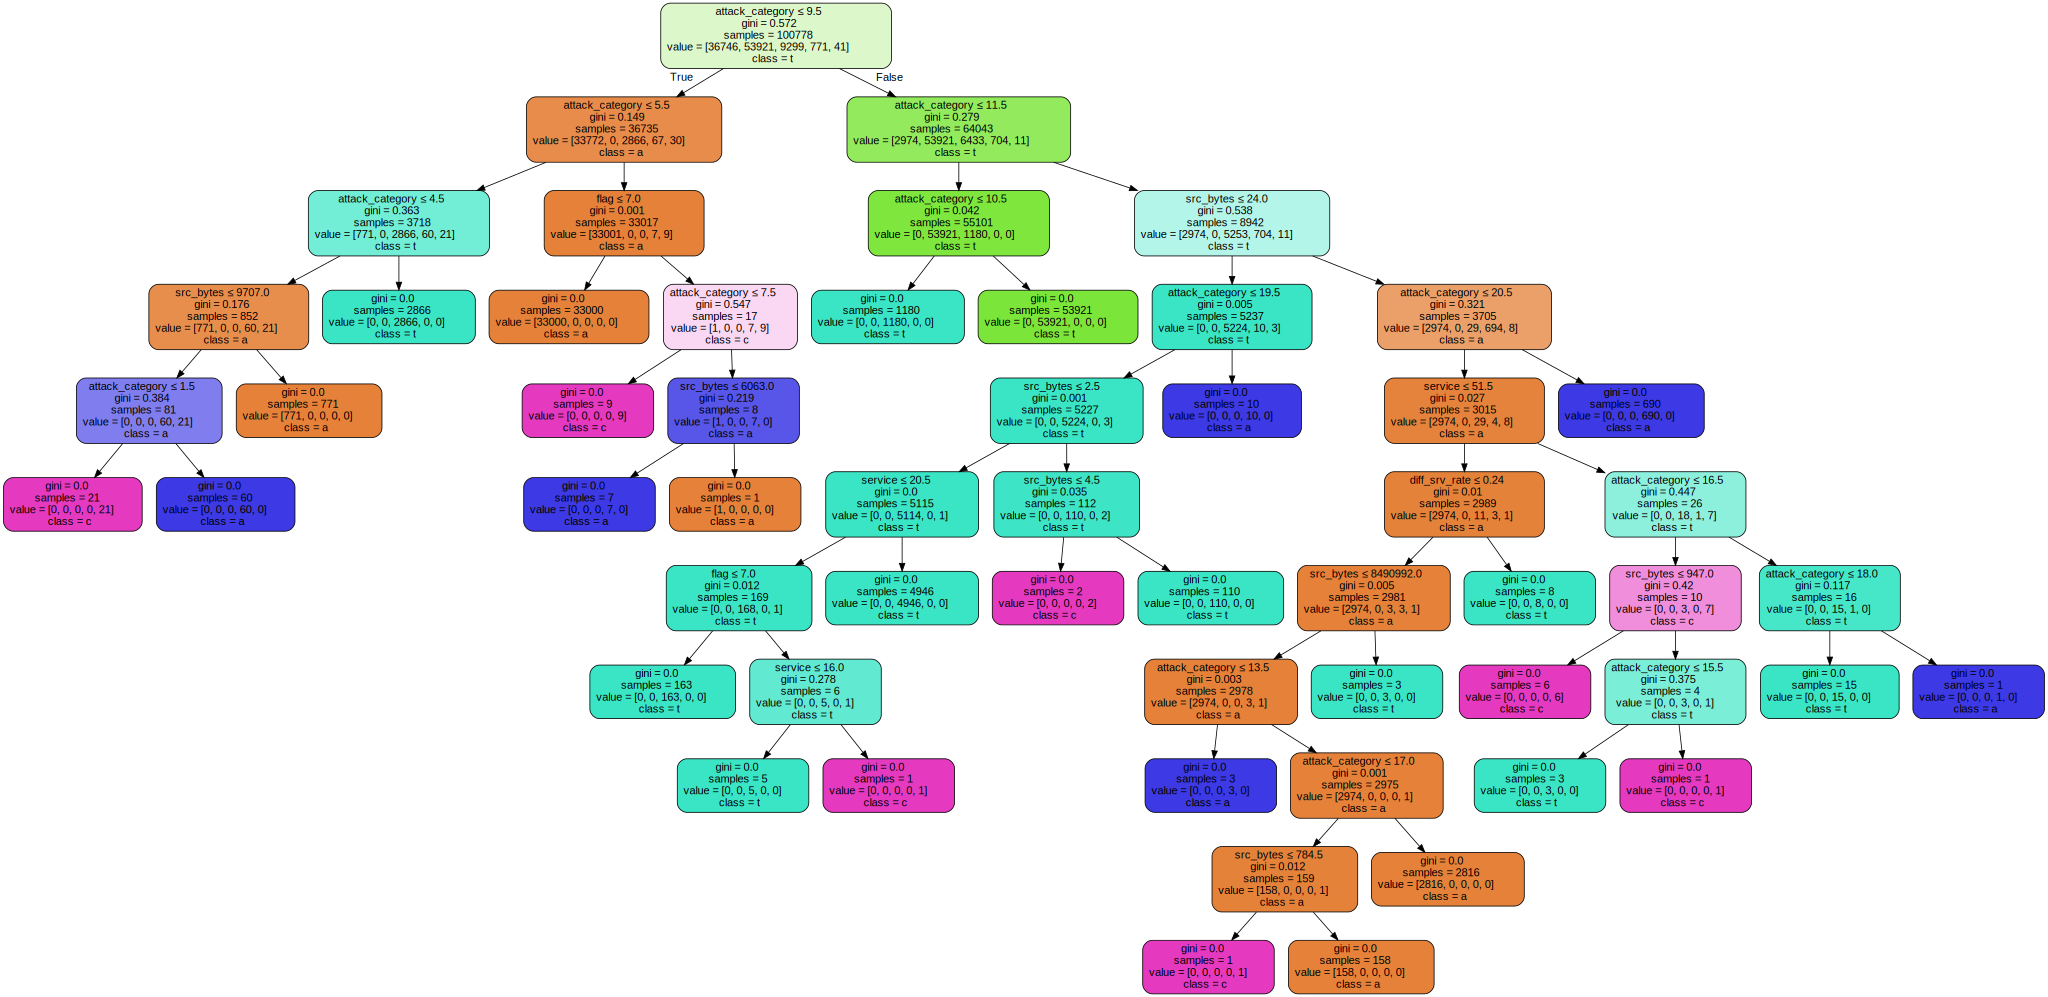

In [79]:
# Visualize the decision tree
dot_data = export_graphviz(clf_using_ig_gini, out_file=None, 
                           feature_names=top_5_cols_using_ig,  
                           class_names='attack_type',  
                           filled=True, rounded=True,  
                           special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("iris_decision_tree")
graph = graphviz.Source(dot_data)
display(SVG(graph.pipe(format='svg')))

# Applying Artificial Neural Network Model

### Applying ANN features selected using Information Gain

In [80]:
X = best_features_using_ig
y = dataset['attack_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
X_train.shape

(100778, 5)

In [82]:
X_train.head()

attack_category  src_bytes  service  diff_srv_rate  flag
95141               11        214       24           0.00     9
37486                9          0       49           0.06     5
34926                9          0       24           0.06     1
34589               11        257       24           0.00     9
11420               11        516       44           0.00     9

In [83]:
X_test.head()

attack_category  src_bytes  service  diff_srv_rate  flag
378                 11         36       12           0.00     9
32038                9          0       24           0.10     5
86399                9          0       47           0.06     5
74412                9          0       49           0.06     1
52951               15          0       49           0.00     4

In [84]:
# Normalize the input features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
X_train

array([[ 0.14415382, -0.00749435, -0.44179813, -0.34956447,  0.75141773],
       [-0.61684847, -0.00752856,  1.08774919, -0.01525403, -0.73563646],
       [-0.61684847, -0.00752856, -0.44179813, -0.01525403, -2.22269065],
       ...,
       [-0.61684847, -0.00752856, -0.44179813,  0.04046437, -2.22269065],
       [ 0.14415382, -0.00747917, -0.44179813, -0.34956447,  0.75141773],
       [ 0.14415382, -0.00752168, -1.17598084, -0.29384607,  0.75141773]])

In [86]:
X_test

array([[ 0.14415382, -0.0075228 , -1.17598084, -0.34956447,  0.75141773],
       [-0.61684847, -0.00752856, -0.44179813,  0.2076196 , -0.73563646],
       [-0.61684847, -0.00752856,  0.9653854 , -0.01525403, -0.73563646],
       ...,
       [ 0.14415382, -0.00545349, -0.6865257 , -0.34956447,  0.75141773],
       [ 0.14415382, -0.00739862,  1.39365865, -0.34956447,  0.75141773],
       [-0.61684847, -0.00752856,  1.08774919, -0.01525403, -0.73563646]])

In [87]:
y_train.head()

95141    1
37486    0
34926    0
34589    1
11420    1
Name: attack_type, dtype: int64

In [88]:
y_test.head()

378      1
32038    0
86399    0
74412    0
52951    2
Name: attack_type, dtype: int64

In [89]:
model_based_on_ig_features = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000, random_state=1)


model_based_on_ig_features.fit(X_train, y_train)



MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=1)

In [90]:
y_pred = model_based_on_ig_features.predict(X_test)

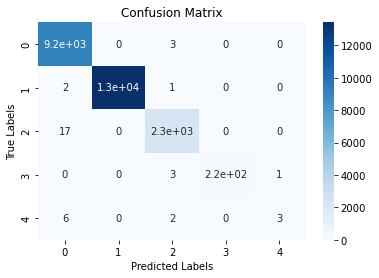

In [91]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("cm_ann_ig.png")
plt.show()

### Inference:
1. The confusion matrix shows that most the values predicted successfully by the model.
2. The row 3 column 1 value **17** show that True value is 2 but the model predicted as 0 are 17 values.

In [92]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
error_rate = 1 - accuracy

# Print the results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))
print("Error Rate: {:.3f}".format(error_rate))

Accuracy: 0.999
Precision: 0.999
Recall: 0.999
F1 Score: 0.999
Error Rate: 0.001


### Apply ANN Model on the Features Selected by Correlation Matrix

In [93]:
X = best_feautres_using_corr
y = dataset['attack_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Normalize the input features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
X_train

array([[-0.62456242, -0.63942029, -0.63170499, -0.63715936,  0.77143339],
       [ 1.61966297,  1.60875752,  1.60574115,  1.60288857, -1.48038983],
       [-0.62456242, -0.63942029, -0.63170499, -0.63715936, -1.43489845],
       ...,
       [-0.62456242, -0.63942029, -0.63170499, -0.63715936, -1.45764414],
       [-0.62456242, -0.63942029, -0.63170499, -0.63715936,  0.77143339],
       [-0.62456242, -0.63942029, -0.63170499, -0.63715936,  0.77143339]])

In [96]:
X_test

array([[-0.62456242, -0.63942029, -0.63170499, -0.63715936,  0.77143339],
       [ 1.61966297,  1.60875752,  1.60574115,  1.60288857, -0.9117476 ],
       [ 1.61966297,  1.60875752,  1.60574115,  1.60288857, -1.34391569],
       ...,
       [-0.62456242, -0.63942029, -0.63170499, -0.63715936,  0.77143339],
       [-0.57967791, -0.59445673, -0.63170499, -0.63715936,  0.77143339],
       [ 1.61966297,  1.60875752,  1.60574115,  1.60288857, -1.27567863]])

In [97]:
y_train.head()

95141    1
37486    0
34926    0
34589    1
11420    1
Name: attack_type, dtype: int64

In [98]:
y_test.head()

378      1
32038    0
86399    0
74412    0
52951    2
Name: attack_type, dtype: int64

In [99]:
model_based_on_corr_features = MLPClassifier(hidden_layer_sizes=(10, 5), activation='logistic', solver='adam', max_iter=1000, random_state=1)


model_based_on_corr_features.fit(X_train, y_train)



MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 5), max_iter=1000,
              random_state=1)

In [100]:
y_pred = model_based_on_ig_features.predict(X_test)

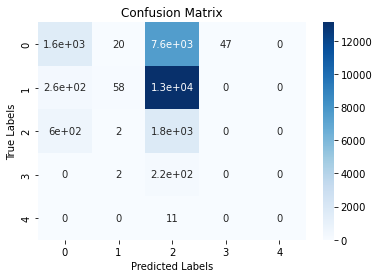

In [101]:
cm = confusion_matrix(y_test, y_pred)
# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("cm_ann_corr.png")
plt.show()

### Inference:
1. The confusion matrix, F1 score and Error rate shows that features selected based on the Correlation matrix are not good.
2. They are giving to less accuracy which is not acceptable.

In [102]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

Accuracy: 0.134
Precision: 0.619
Recall: 0.134
F1 Score: 0.116


/home/jawad_ahmed/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Applying KNN Model

## Applying KNN on Features Selected By Correlation Matrix

In [103]:
X = best_feautres_using_corr
y = dataset['attack_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Create a KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8764834292518356


### Applying Grid Search To Select Best Value of K

In [105]:
X = best_feautres_using_corr
y = dataset['attack_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Create a KNN model
knn = KNeighborsClassifier()

# Define the grid of hyperparameters to search over
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11]}

# Create a grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Train the grid search object using the training set
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 7}
Best score: 0.8822064380097704


In [107]:
knn = KNeighborsClassifier(n_neighbors=11)

# Train the model using the training set
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

## Confusion Matrix For Performance Evaluation

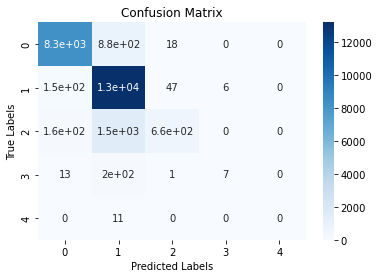

In [108]:
cm = confusion_matrix(y_test, y_pred)
# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("cm_knn_corr.png")
plt.show()

In [109]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

Accuracy: 0.880
Precision: 0.885
Recall: 0.880
F1 Score: 0.861


/home/jawad_ahmed/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Applying KNN on Features Selected Using Information Gain 

In [110]:
X = best_features_using_ig
y = dataset['attack_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# Create a KNN model
knn = KNeighborsClassifier()

# Define the grid of hyperparameters to search over
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11]}

# Create a grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Train the grid search object using the training set
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 1}
Best score: 0.9989878742385923


In [112]:
knn = KNeighborsClassifier(n_neighbors=1)

# Train the model using the training set
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

## Confusion Matrix For Performance Evaluation

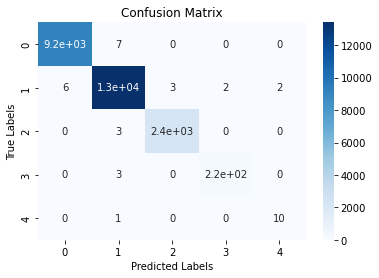

In [113]:
cm = confusion_matrix(y_test, y_pred)
# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("cm_knn_ig.png")
plt.show()

### Inference:
1. The confusion Matrix shows that most of the values are predicted correctly by the model. 
2. Thirty Six values that are not predicted by the model

In [114]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

Accuracy: 0.999
Precision: 0.999
Recall: 0.999
F1 Score: 0.999


# Applying K-Mean Clustering Model

## Features Selected By Correlation Matrix

In [115]:
# Create a scaler object
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(best_feautres_using_corr)

In [116]:
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

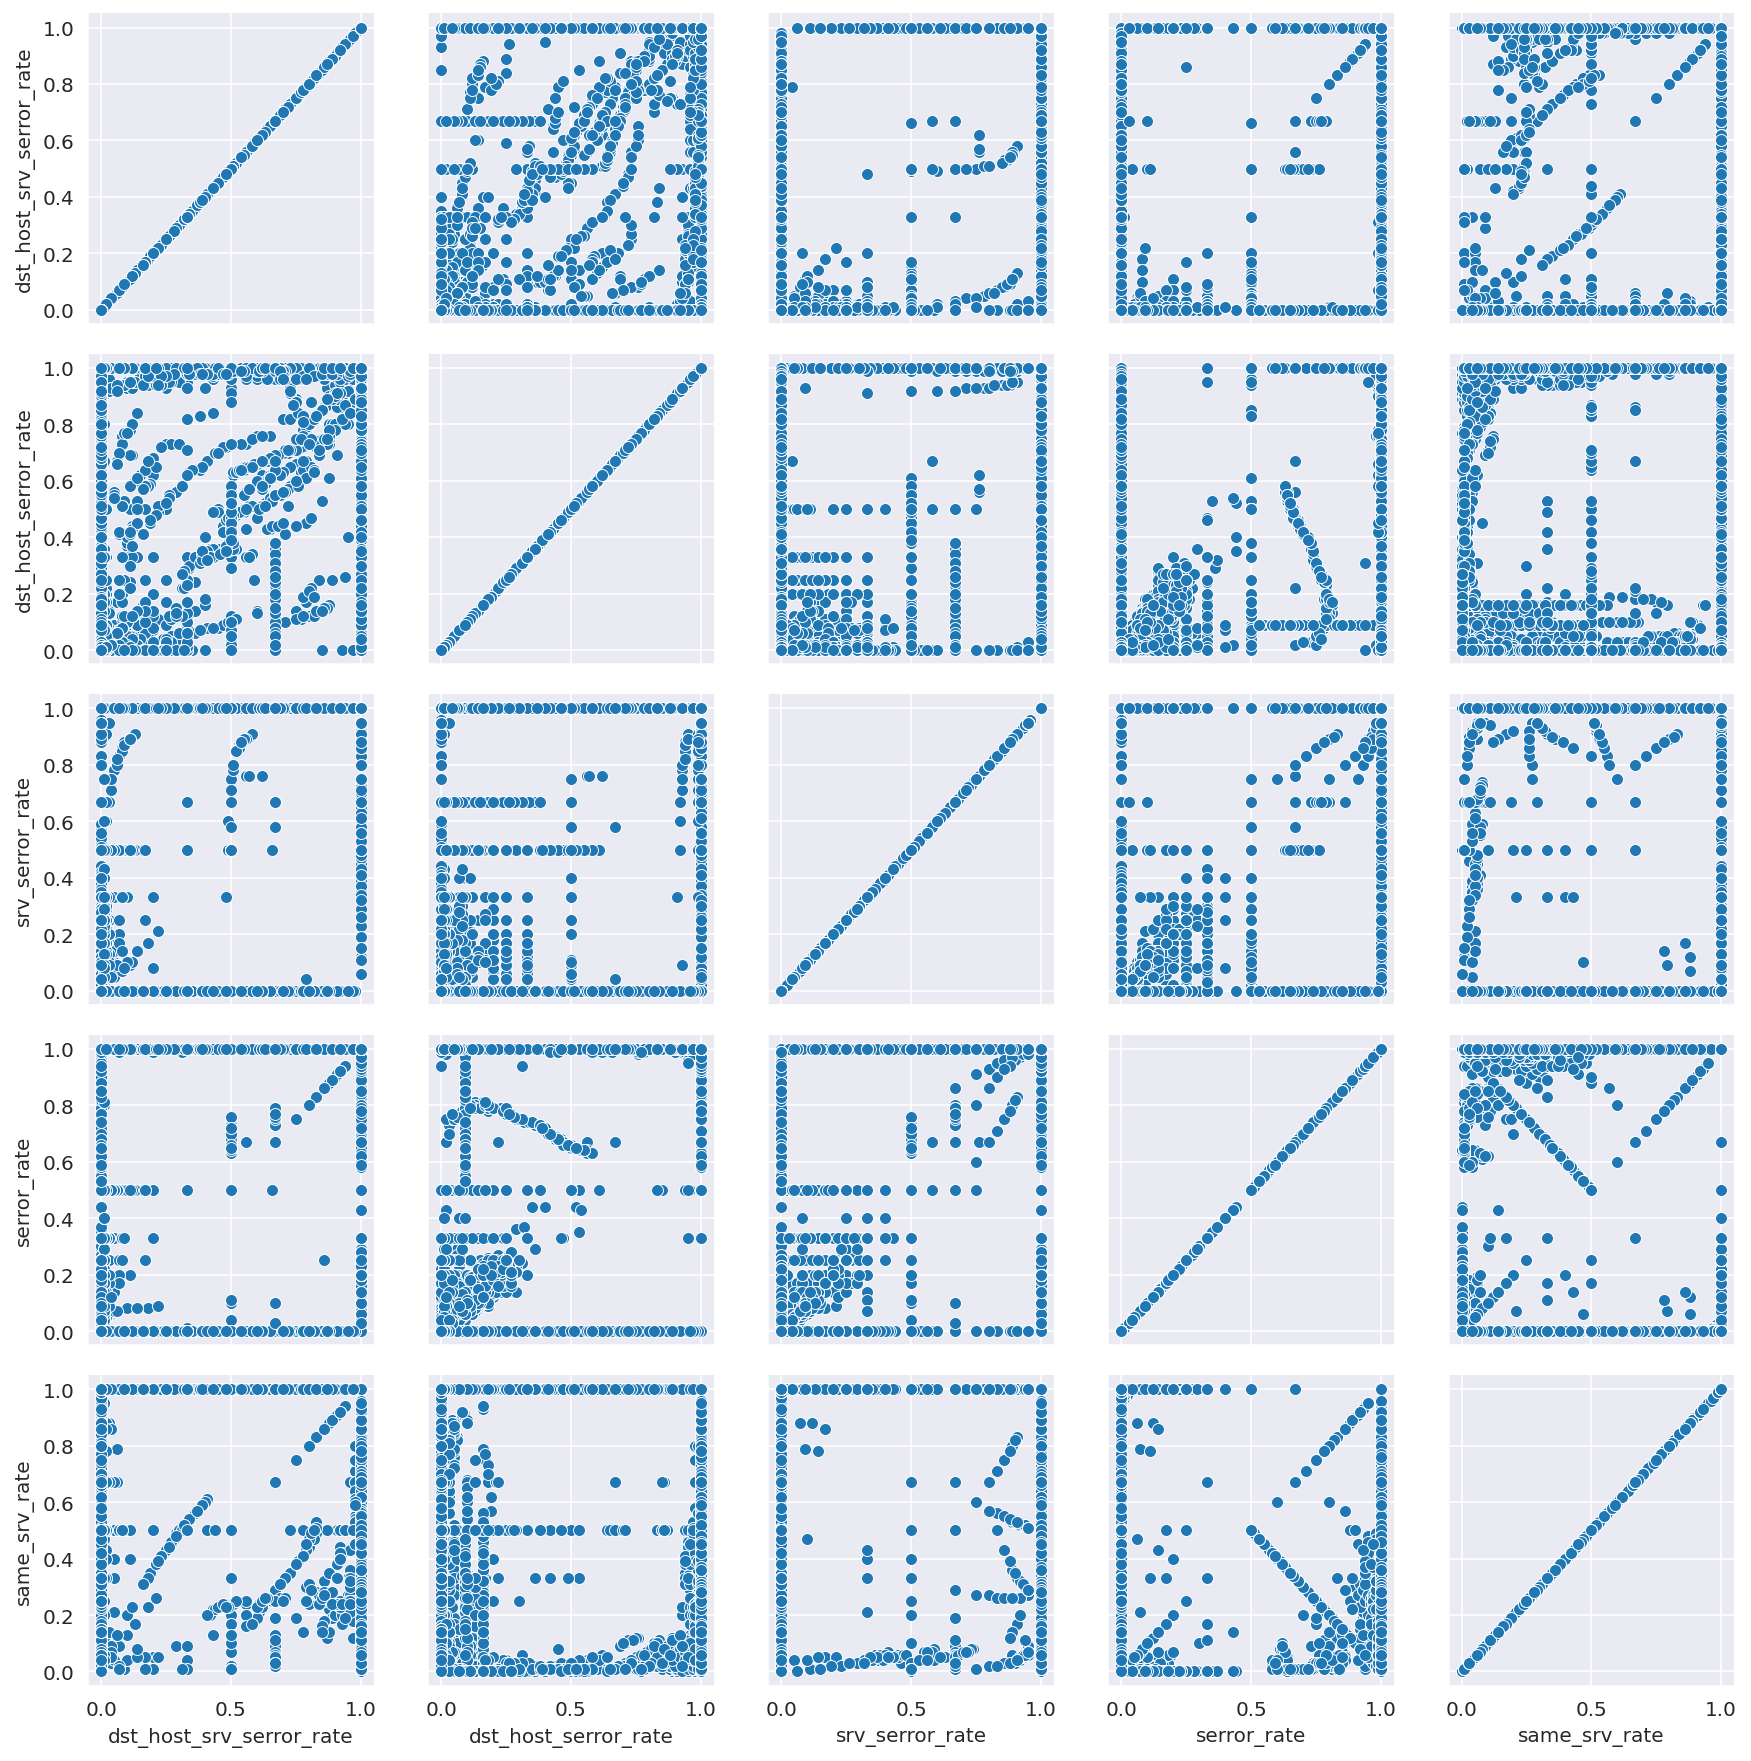

In [117]:
# Visualize the correlation your data and identify variables for further analysis
g = sns.PairGrid(best_feautres_using_corr)
g.map(sns.scatterplot);

## Elbow Method

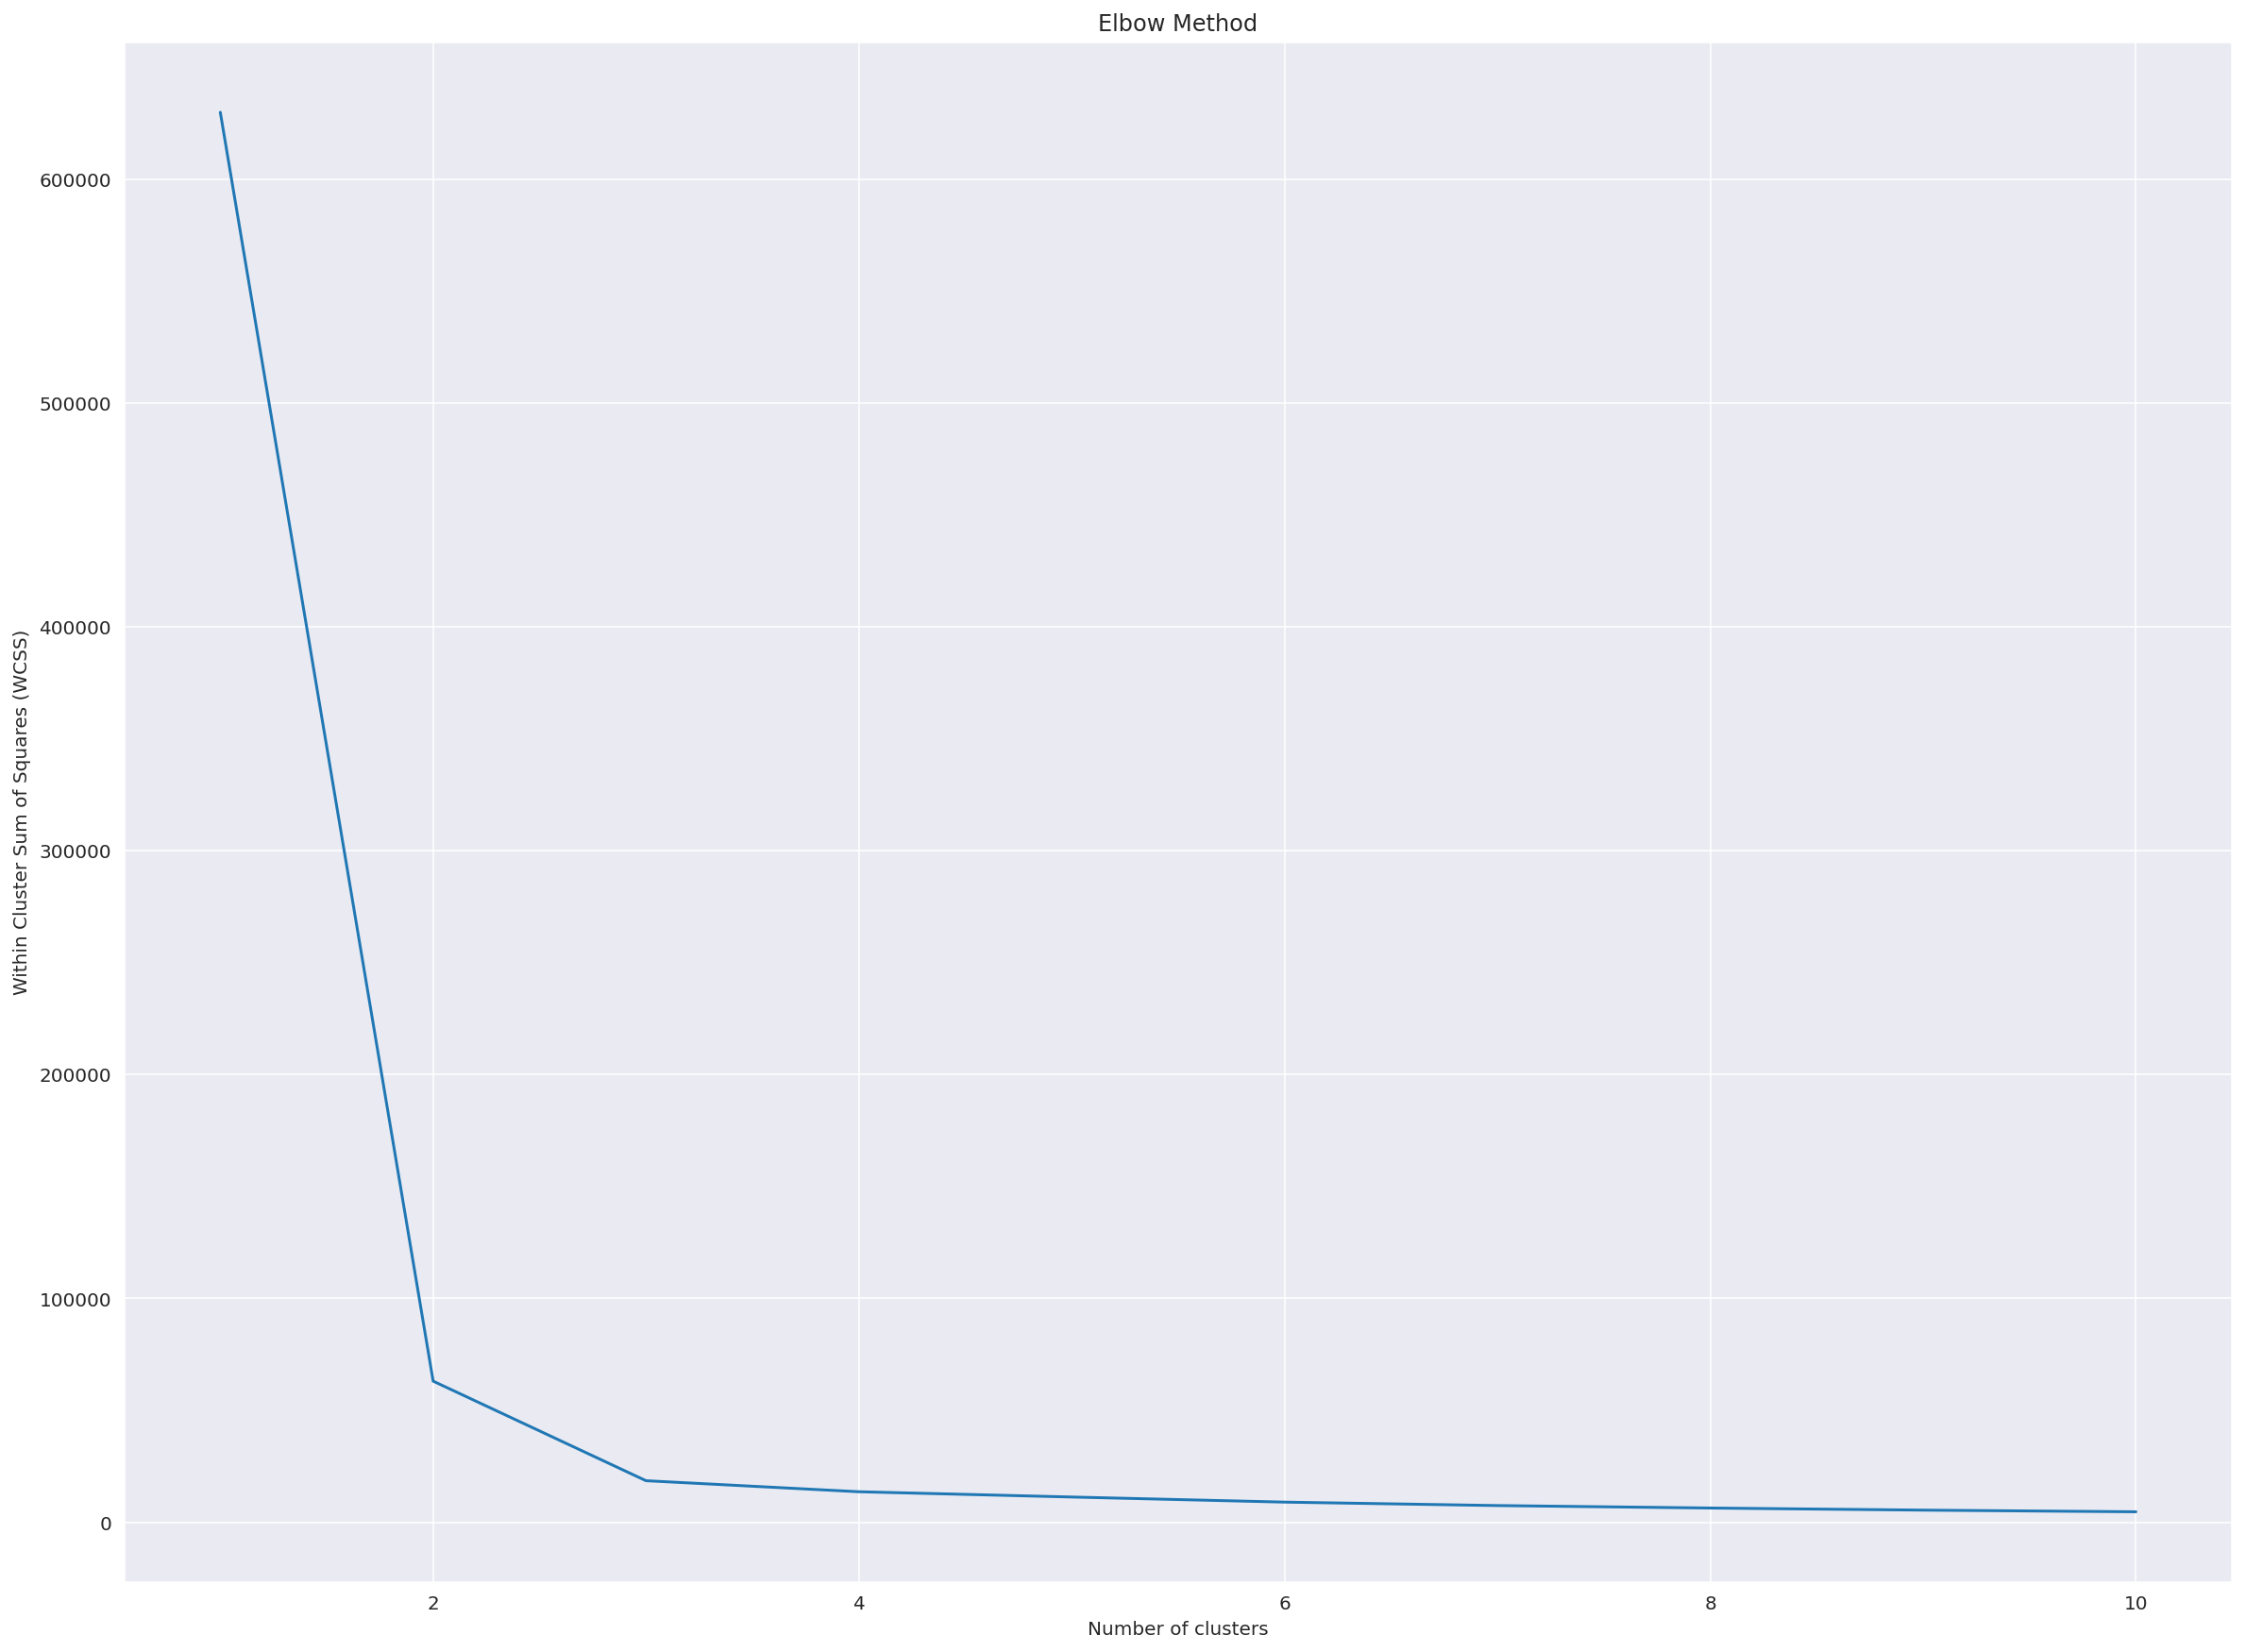

In [118]:
fig, ax = plt.subplots(figsize=(20, 15))

# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(scaled_data)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
ax.plot(range(1, 11), wcss)
ax.set_title('Elbow Method')                               # Set plot title
ax.set_xlabel('Number of clusters')                        # Set x axis name
ax.set_ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name

# Save the plot as a PNG image
plt.savefig('elbow_plot.png', dpi=300)

plt.show()


### Visualize the Scatter Plot

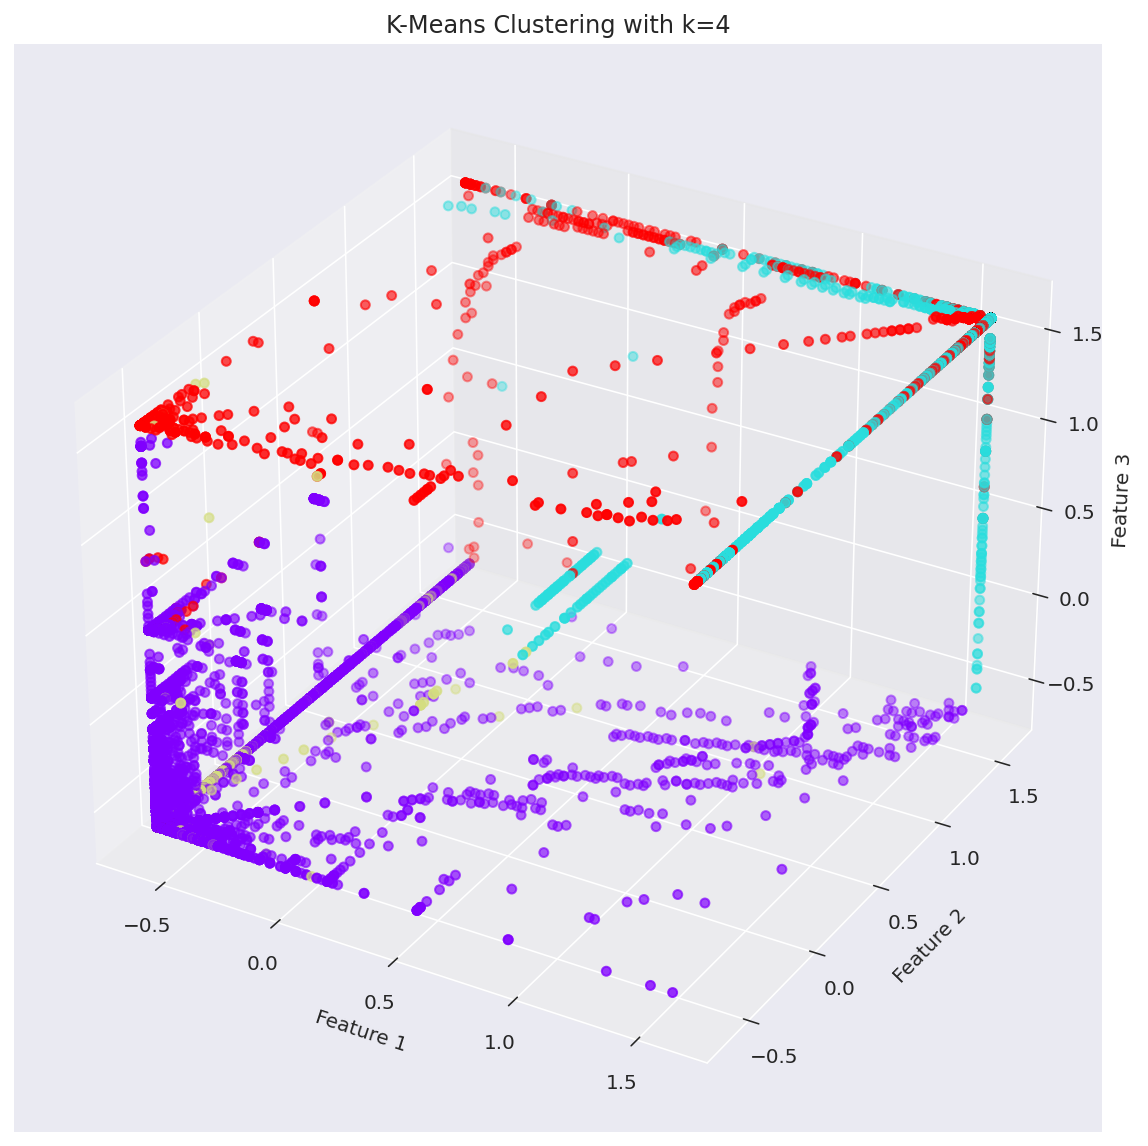

In [119]:
# Convert dataframe to numpy array
data = scaled_data

# Set the number of clusters
k = 4

# Initialize the k-means algorithm
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the algorithm to the data
labels = kmeans.fit_predict(data)

# Visualize the clusters in 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='rainbow')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('K-Means Clustering with k=4')

# Save the graph
plt.savefig('kmeans_cluster.png')

# Show the graph
plt.show()


# Applying K-Mean On the Feature Selected Using Information Gain

In [120]:
best_features_using_ig.head()

attack_category  src_bytes  service  diff_srv_rate  flag
0               11        491       20           0.00     9
1               11        146       44           0.15     9
2                9          0       49           0.07     5
3               11        232       24           0.00     9
4               11        199       24           0.00     9

In [121]:
# Create a scaler object
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(best_features_using_ig)

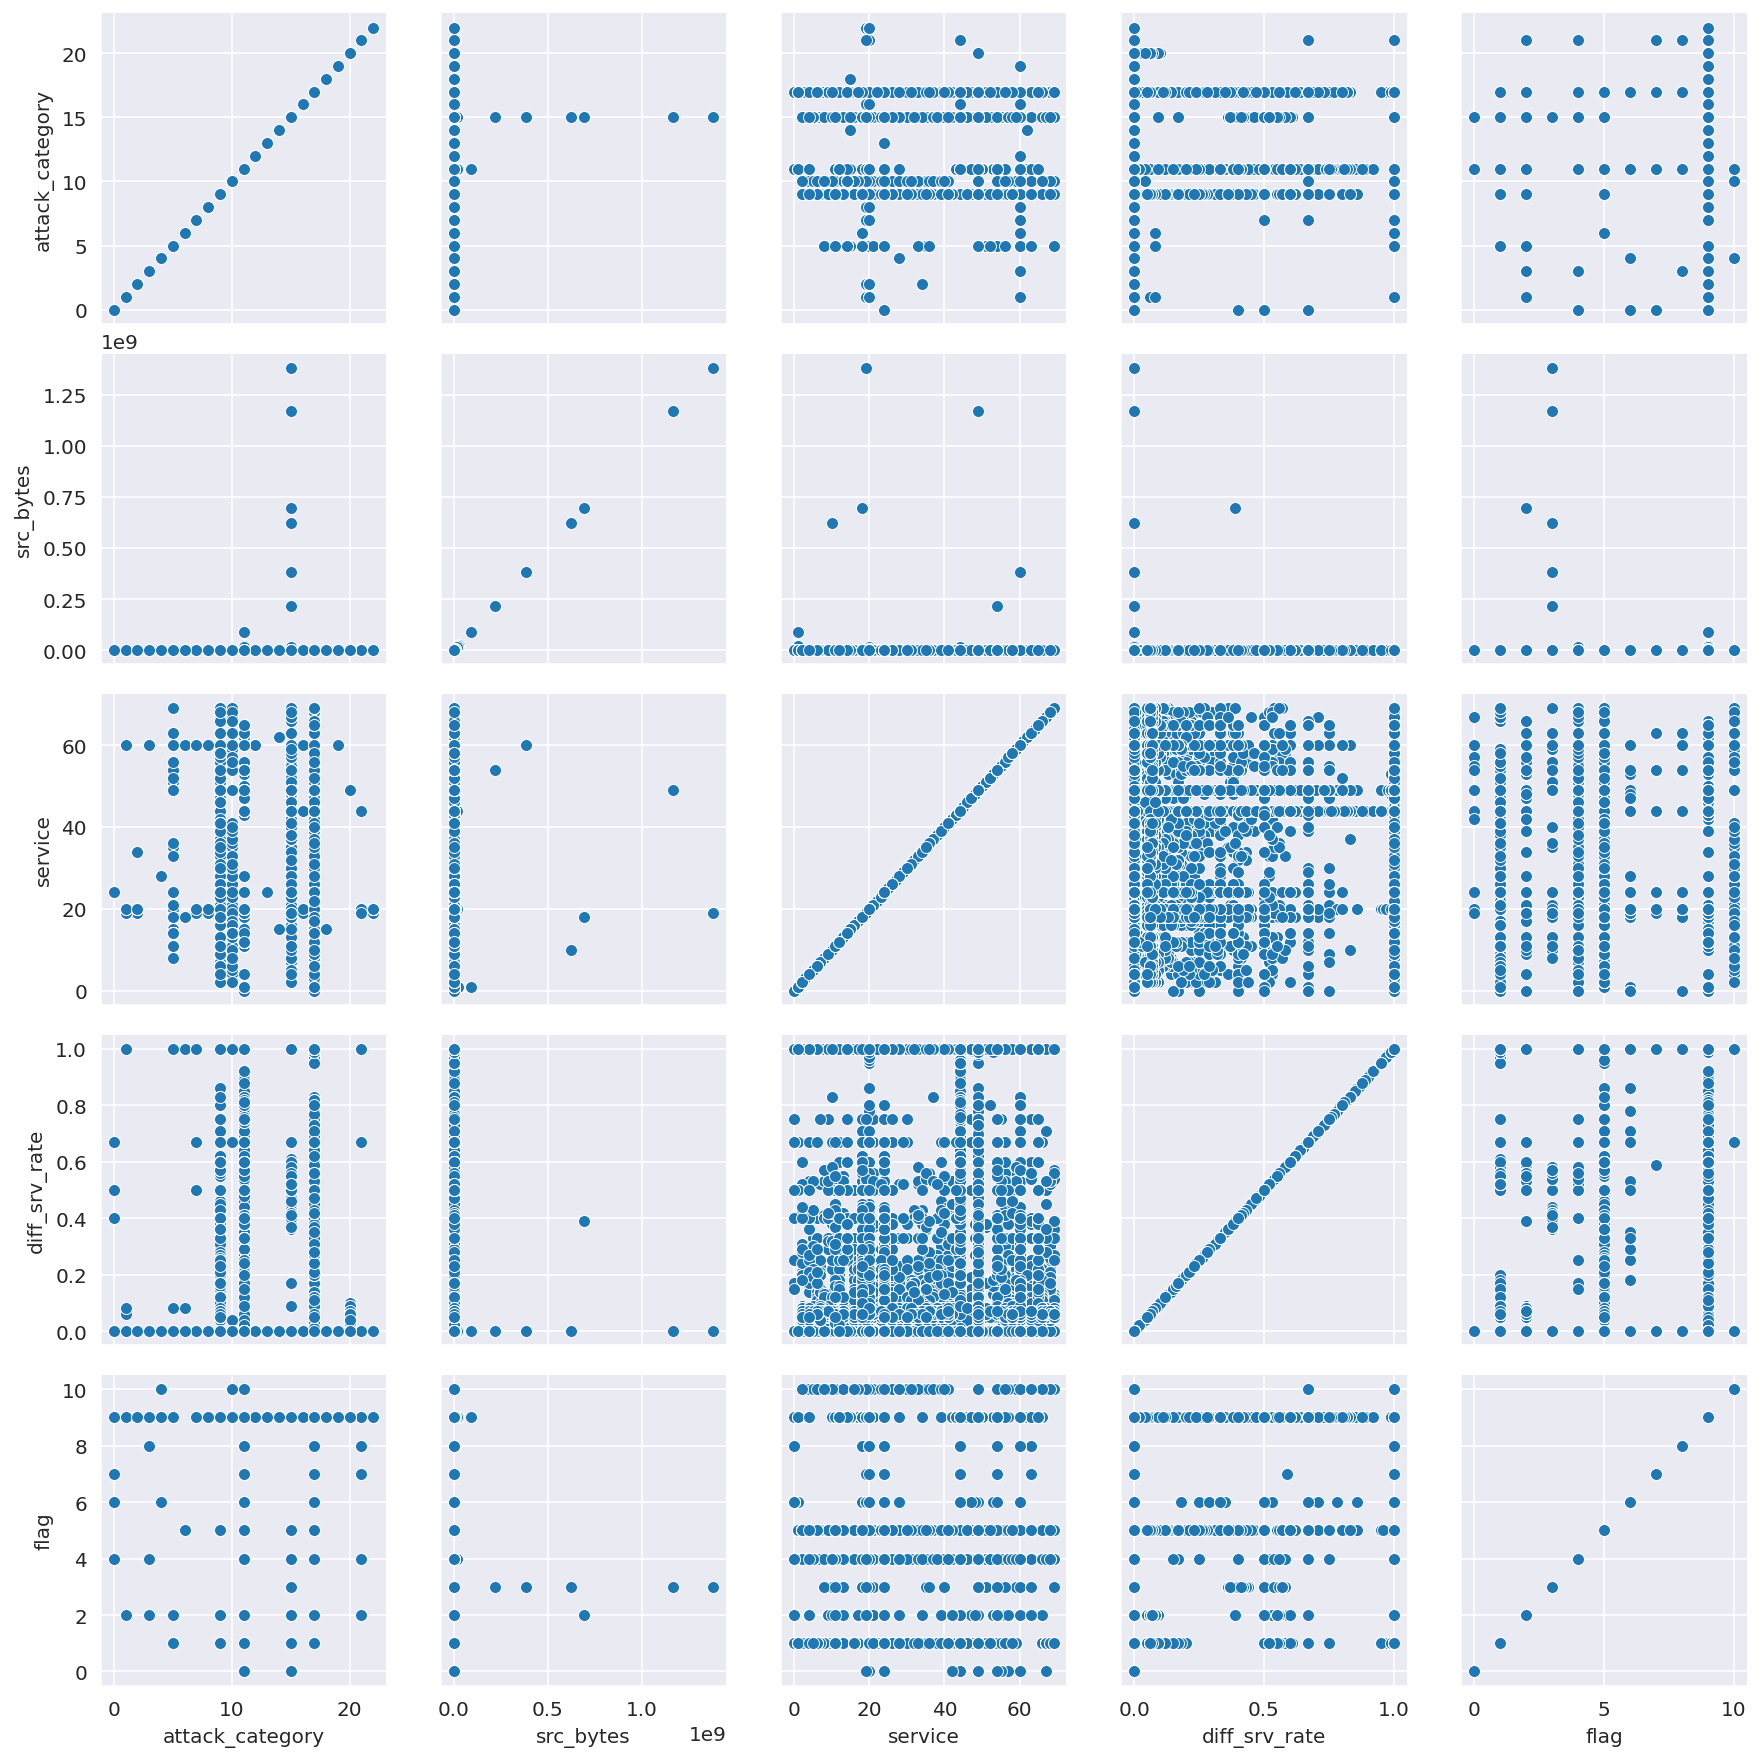

In [122]:
# Visualize the correlation your data and identify variables for further analysis
g = sns.PairGrid(best_features_using_ig)
g.map(sns.scatterplot);

## Elbow Method

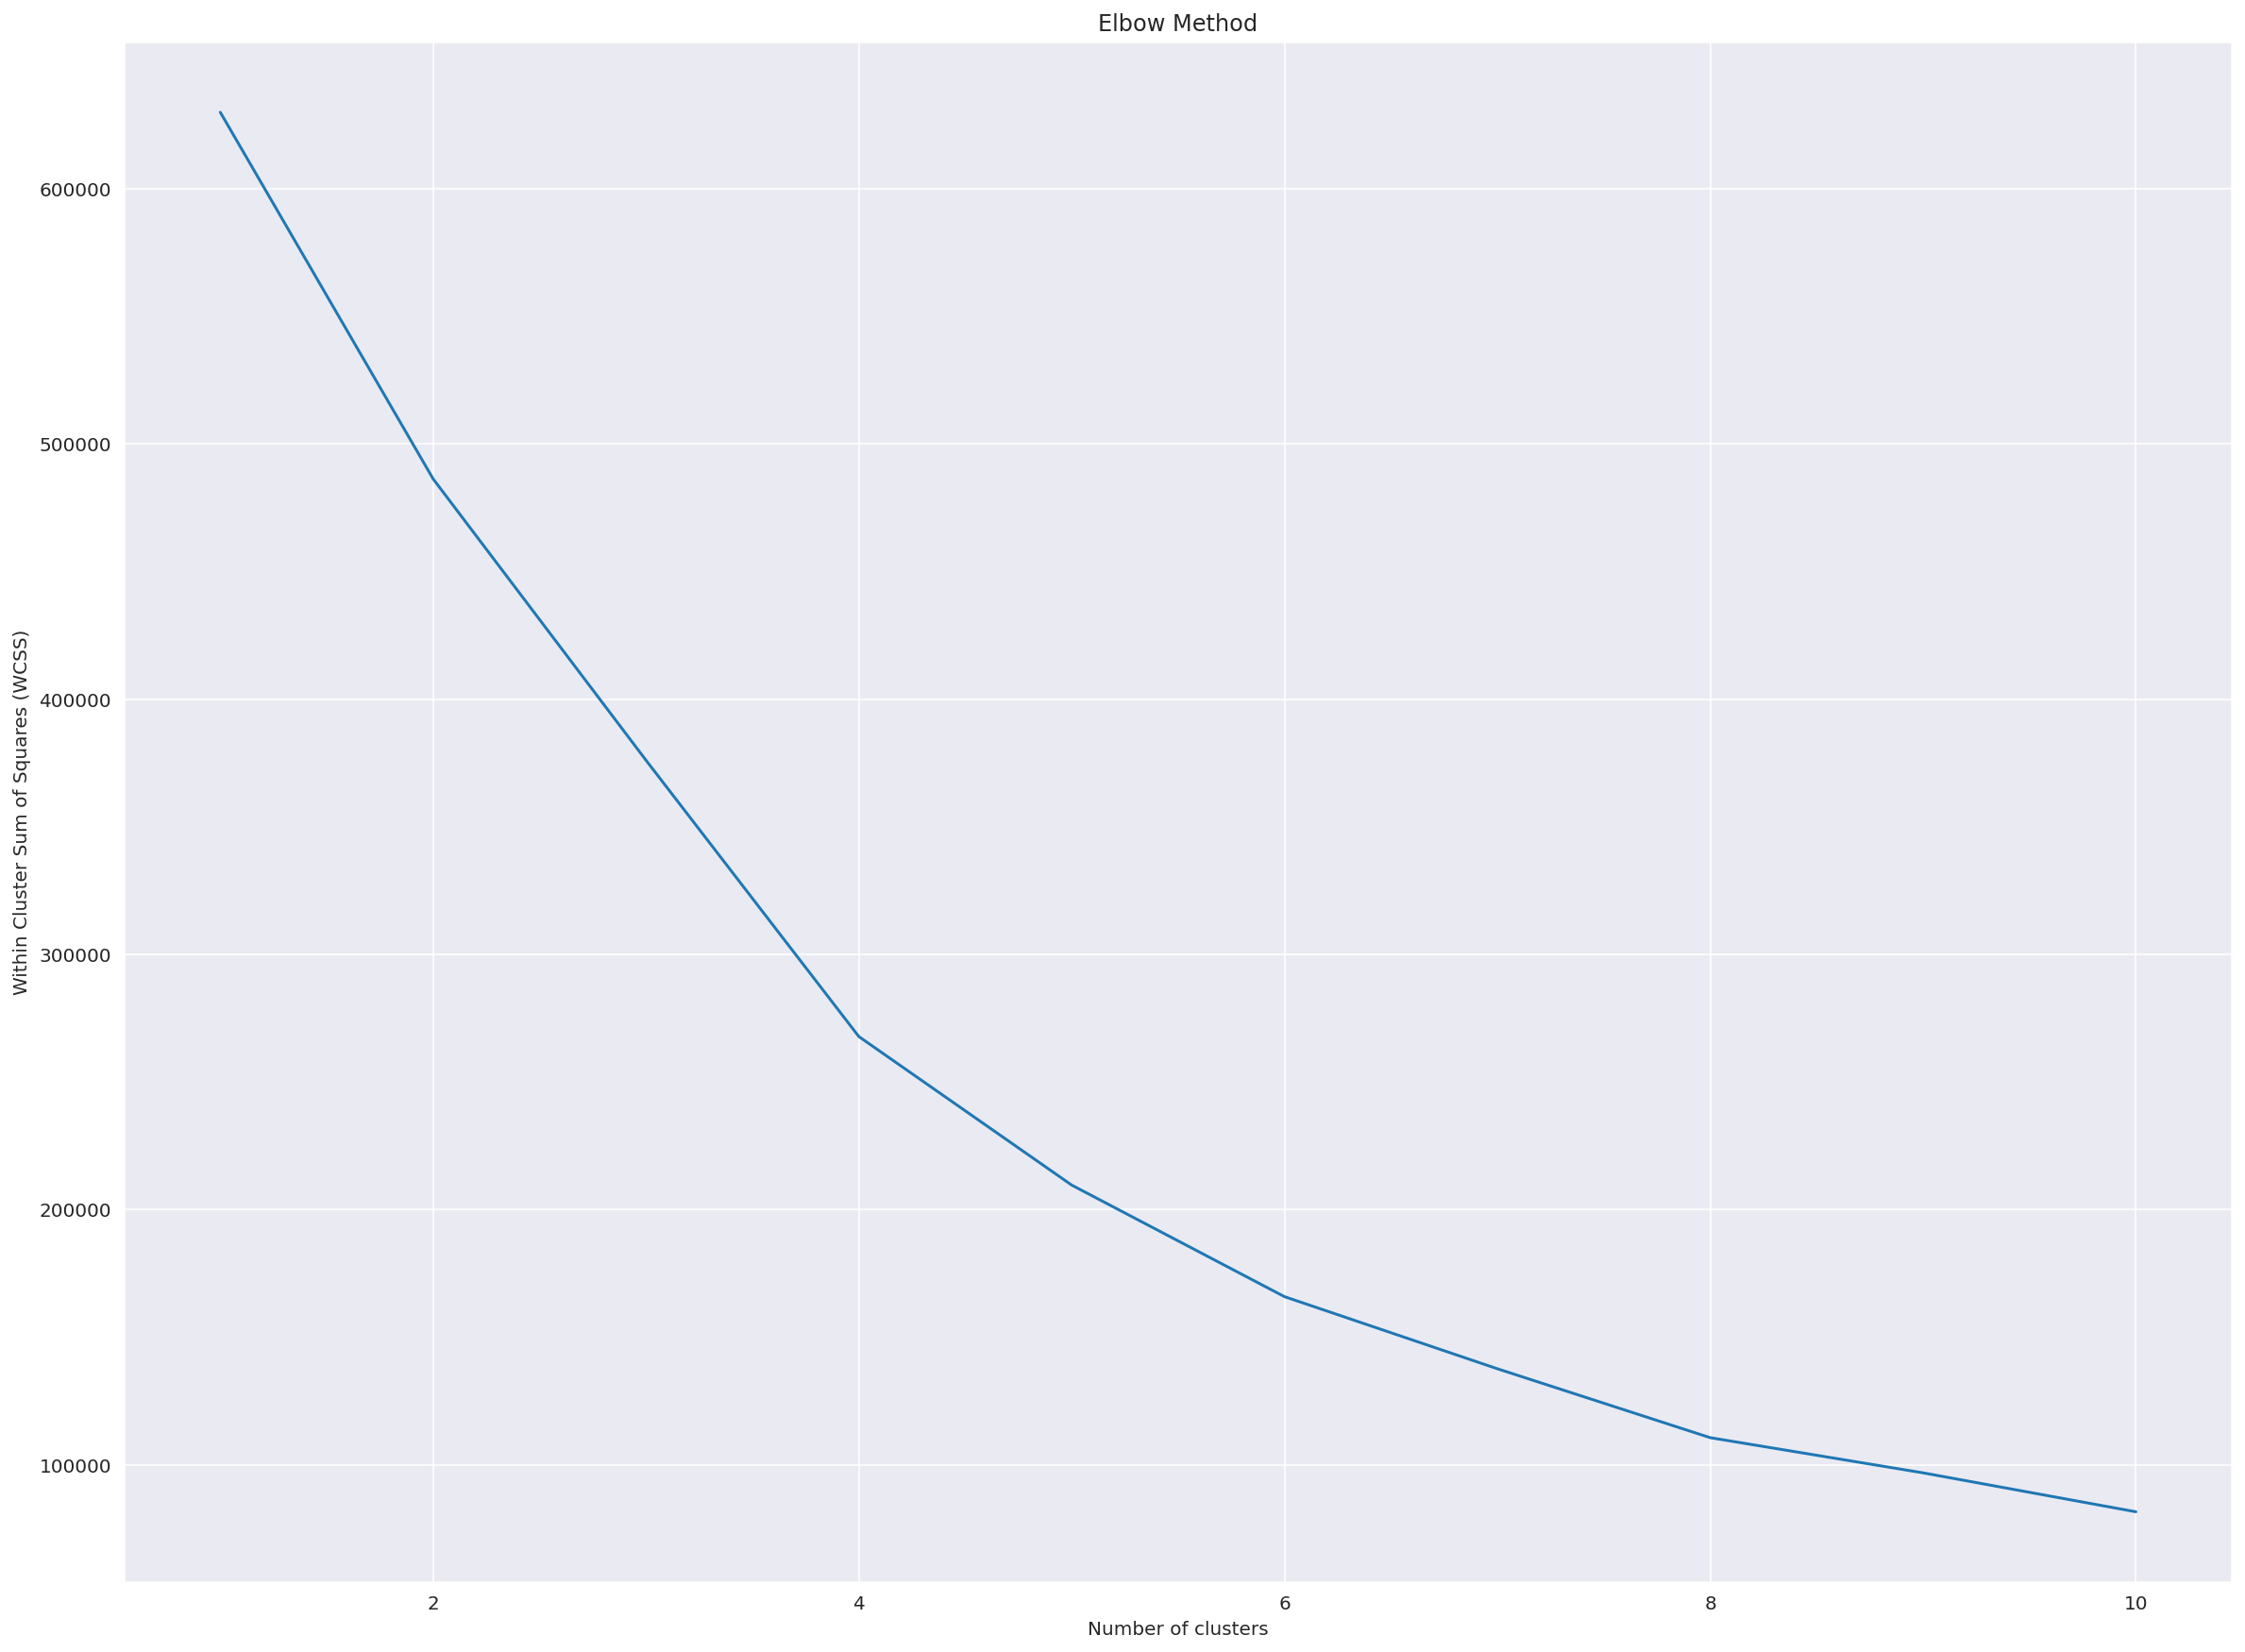

In [123]:
fig, ax = plt.subplots(figsize=(20, 15))

# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(scaled_data)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
ax.plot(range(1, 11), wcss)
ax.set_title('Elbow Method')                               # Set plot title
ax.set_xlabel('Number of clusters')                        # Set x axis name
ax.set_ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name

# Save the plot as a PNG image
plt.savefig('elbow_plot.png', dpi=300)

plt.show()


## Visualize the Scatter Plot

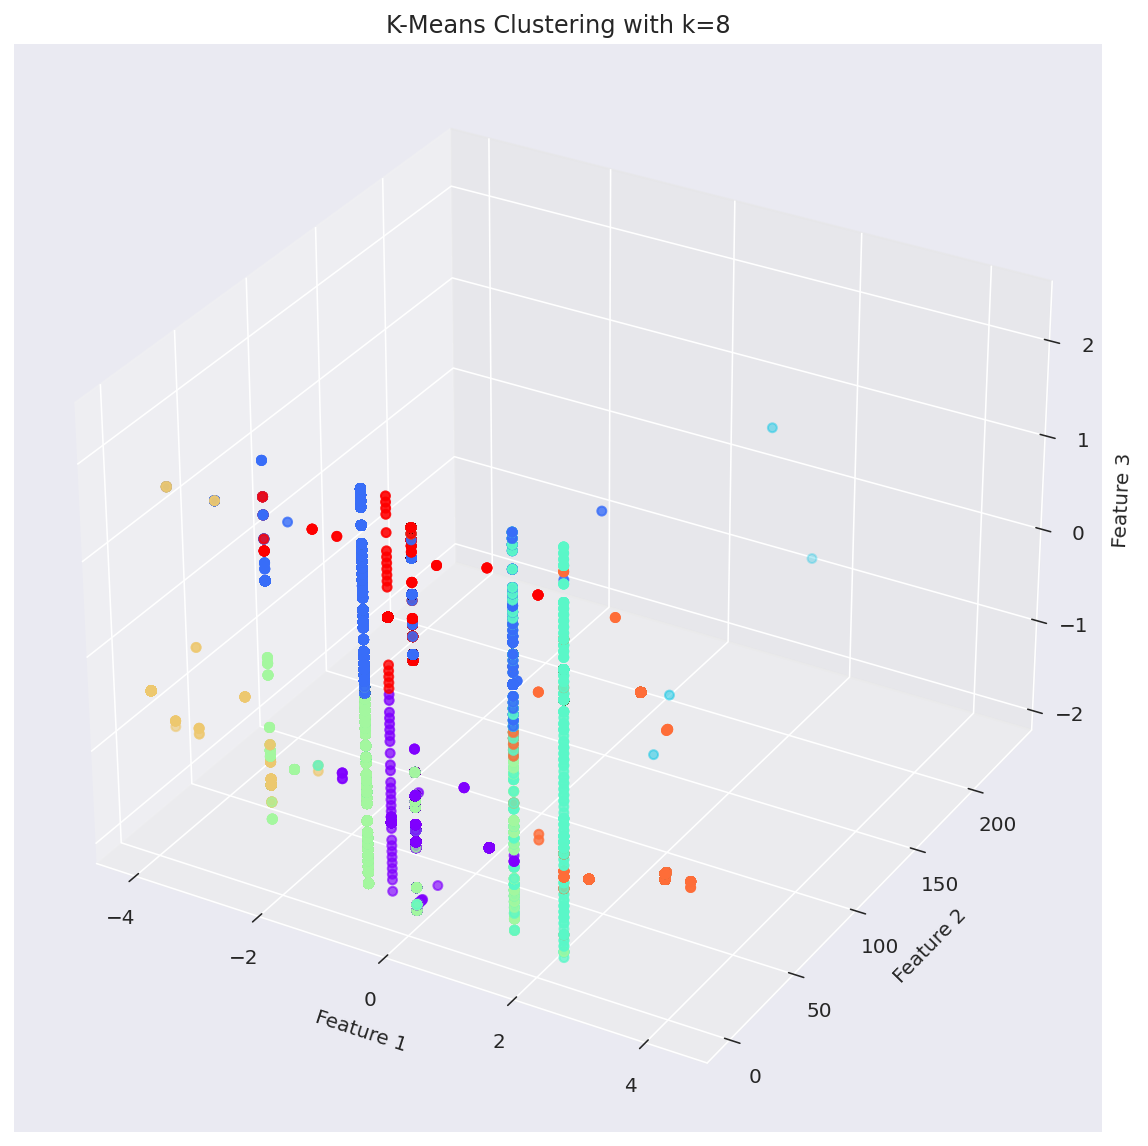

In [124]:
# Convert dataframe to numpy array
data = scaled_data

# Set the number of clusters
k = 8

# Initialize the k-means algorithm
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the algorithm to the data
labels = kmeans.fit_predict(data)

# Visualize the clusters in 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='rainbow')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('K-Means Clustering with k=8')

# Save the graph
plt.savefig('kmeans_cluster_1.png')

plt.show()

## Select Features Using PCA (Principle Component Analysis)

In [125]:
dataset_kmeans = dataset.drop('attack_type', axis=1)

In [126]:
dataset_kmeans.head()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack_category  occurance  
0               11         20  
1               11         15  
2                9         19  
3               11         21  
4               11         21  

[5 rows x 43 columns]

In [127]:
# Instantiate PCA
pca = PCA(n_components=3)

# Fit the PCA to the data
pca.fit(dataset_kmeans)

# Transform the data using the PCA
transformed_data = pca.transform(dataset_kmeans)

# Create a new DataFrame with the transformed data and column names
df_transformed = pd.DataFrame(data=transformed_data, columns=['Feature 1', 'Feature 2', 'Feature 3'])

# Print the explained variance ratio of the PCA
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [6.80620901e-01 3.19378965e-01 1.33150173e-07]


In [128]:
df_transformed.head()

Feature 1     Feature 2   Feature 3
0 -45080.955113 -19767.258863 -284.609780
1 -45425.955109 -19767.168071 -284.304068
2 -45571.955118 -19767.129666 -284.802112
3 -45337.809729 -11614.191028 -286.106906
4 -45372.844627 -19347.182064 -285.608626

In [129]:
# Create a scaler object
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_transformed)

In [130]:
scaled_data

array([[-0.00767949, -0.0049157 , -0.10961518],
       [-0.00773826, -0.00491567, -0.10949744],
       [-0.00776313, -0.00491566, -0.10968926],
       ...,
       [-0.00738306, -0.00482032, -0.10956004],
       [-0.00776313, -0.00491566, -0.10969017],
       [-0.00773741, -0.00491567, -0.10962402]])

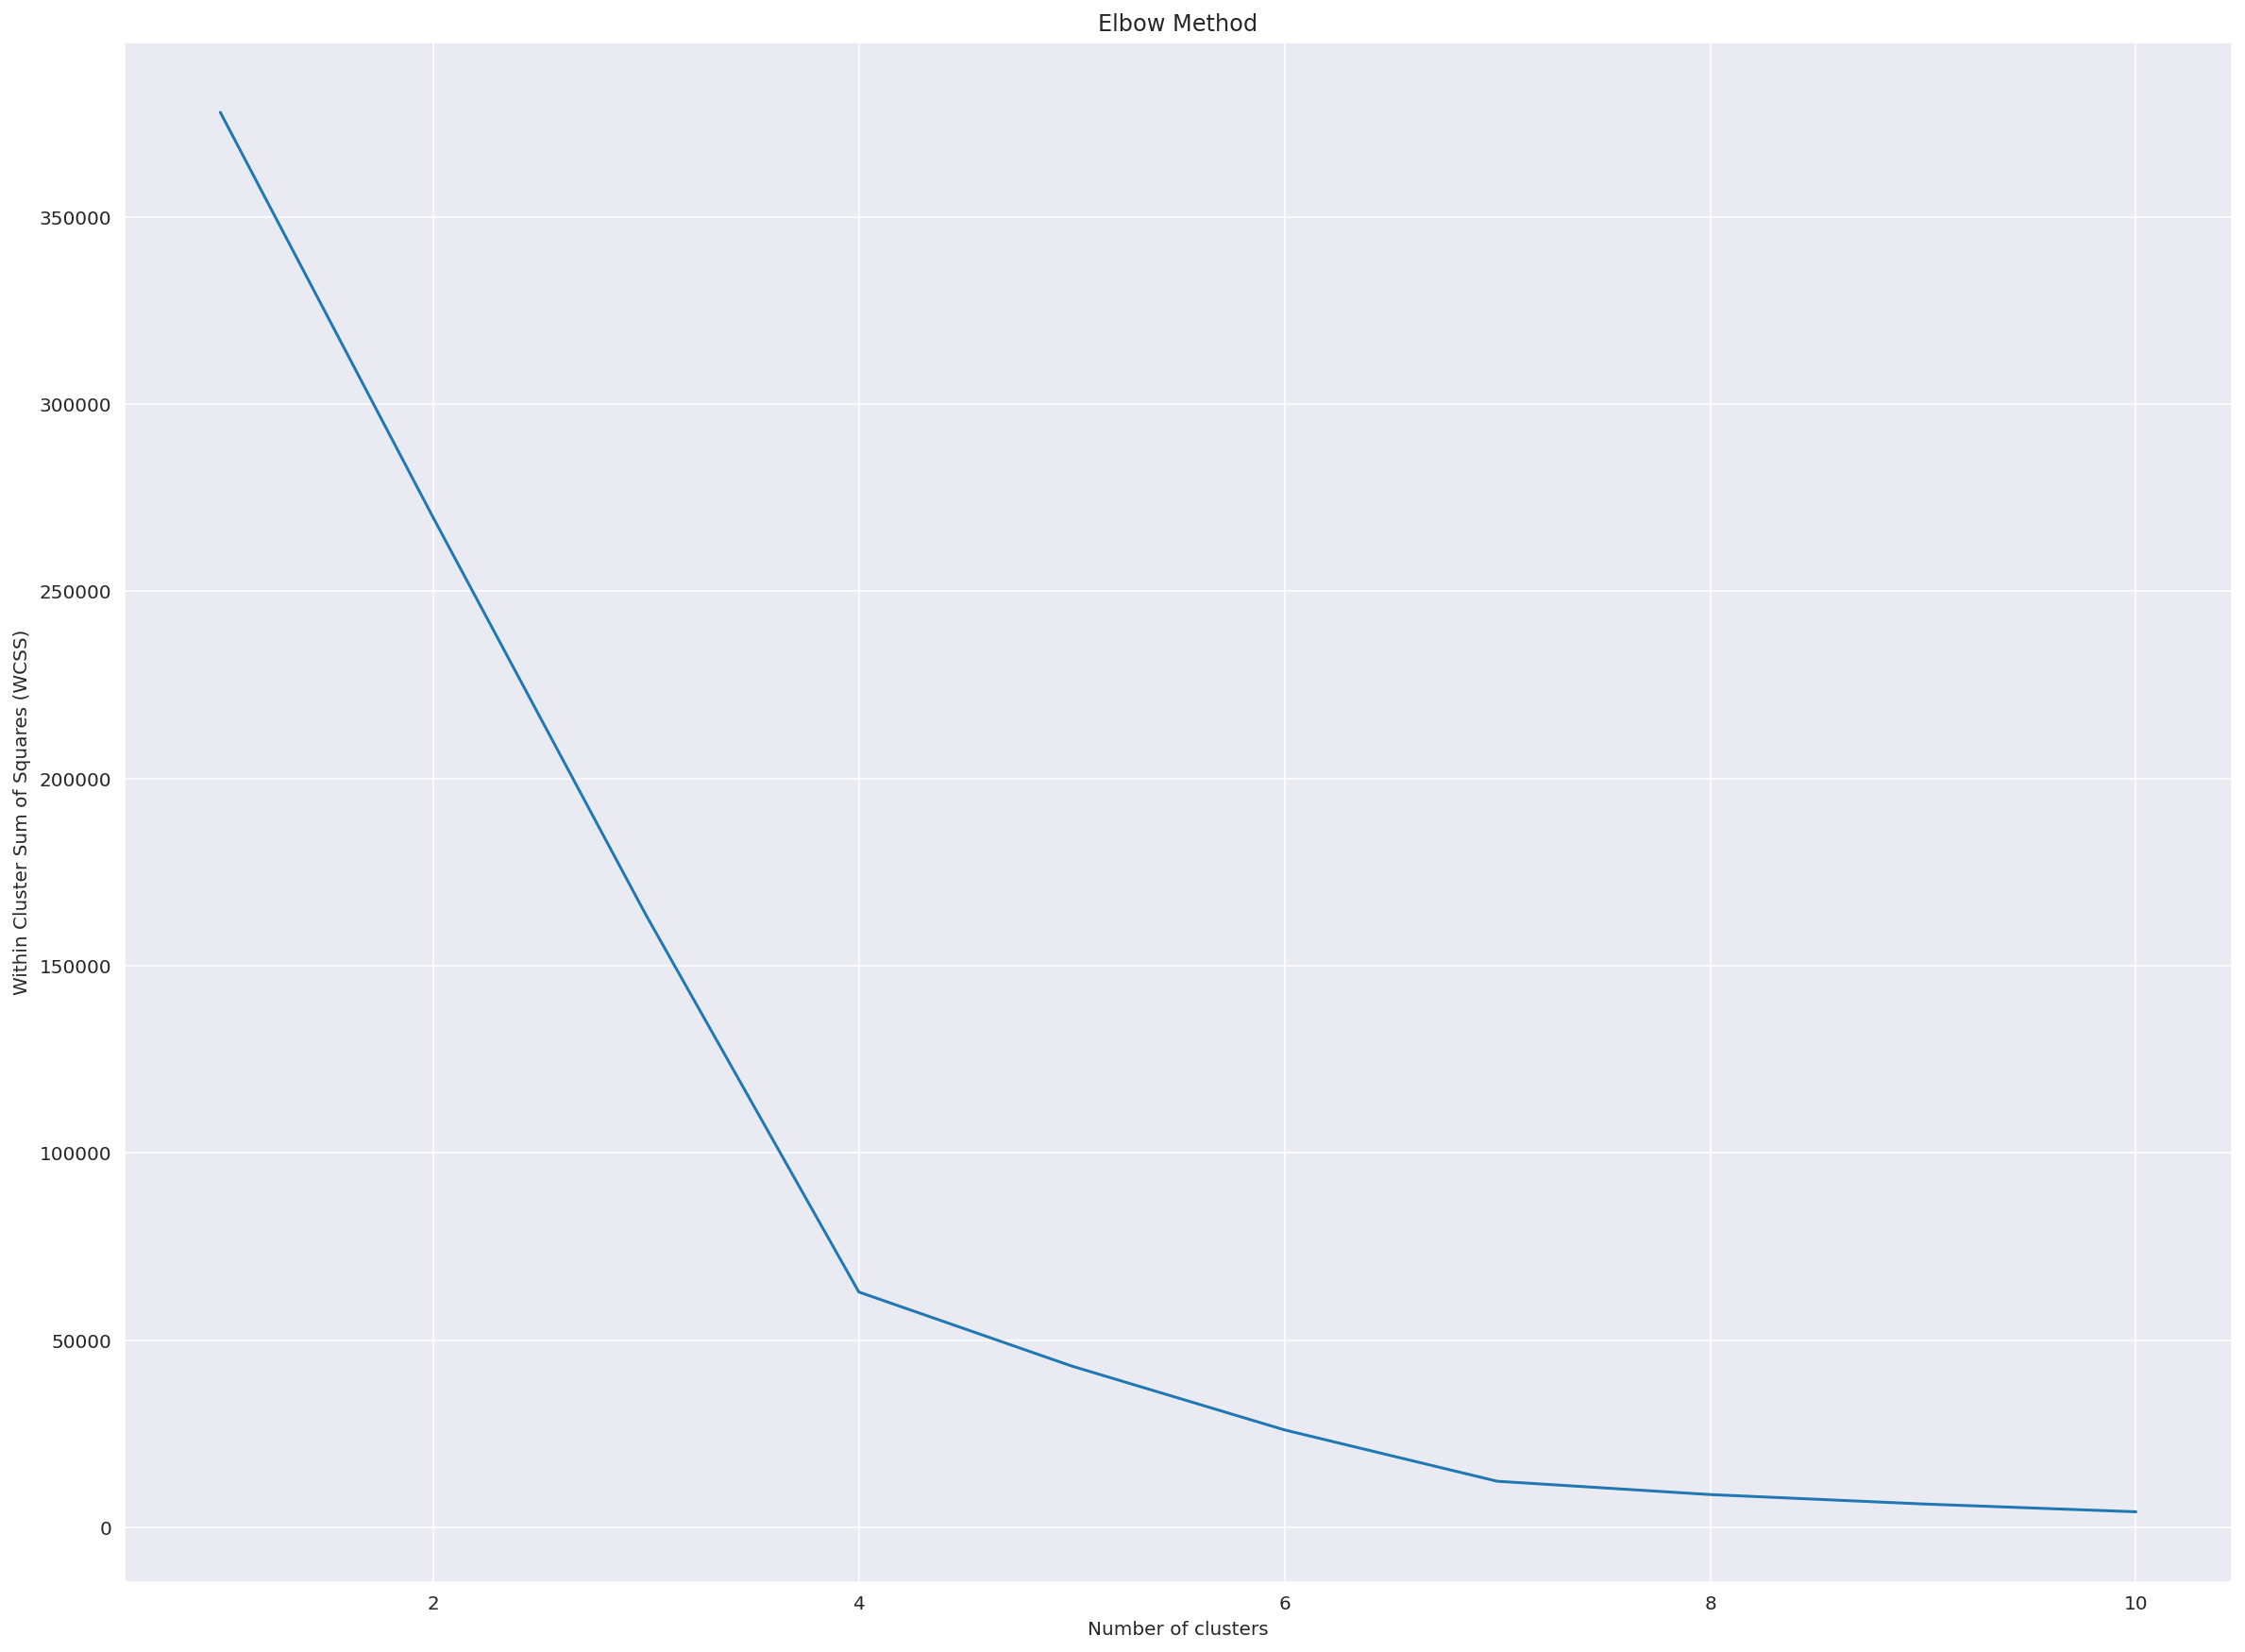

In [131]:
fig, ax = plt.subplots(figsize=(20, 15))

# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(scaled_data)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
ax.plot(range(1, 11), wcss)
ax.set_title('Elbow Method')                               # Set plot title
ax.set_xlabel('Number of clusters')                        # Set x axis name
ax.set_ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name

# Save the plot as a PNG image
plt.savefig('elbow_plot.png', dpi=300)

plt.show()


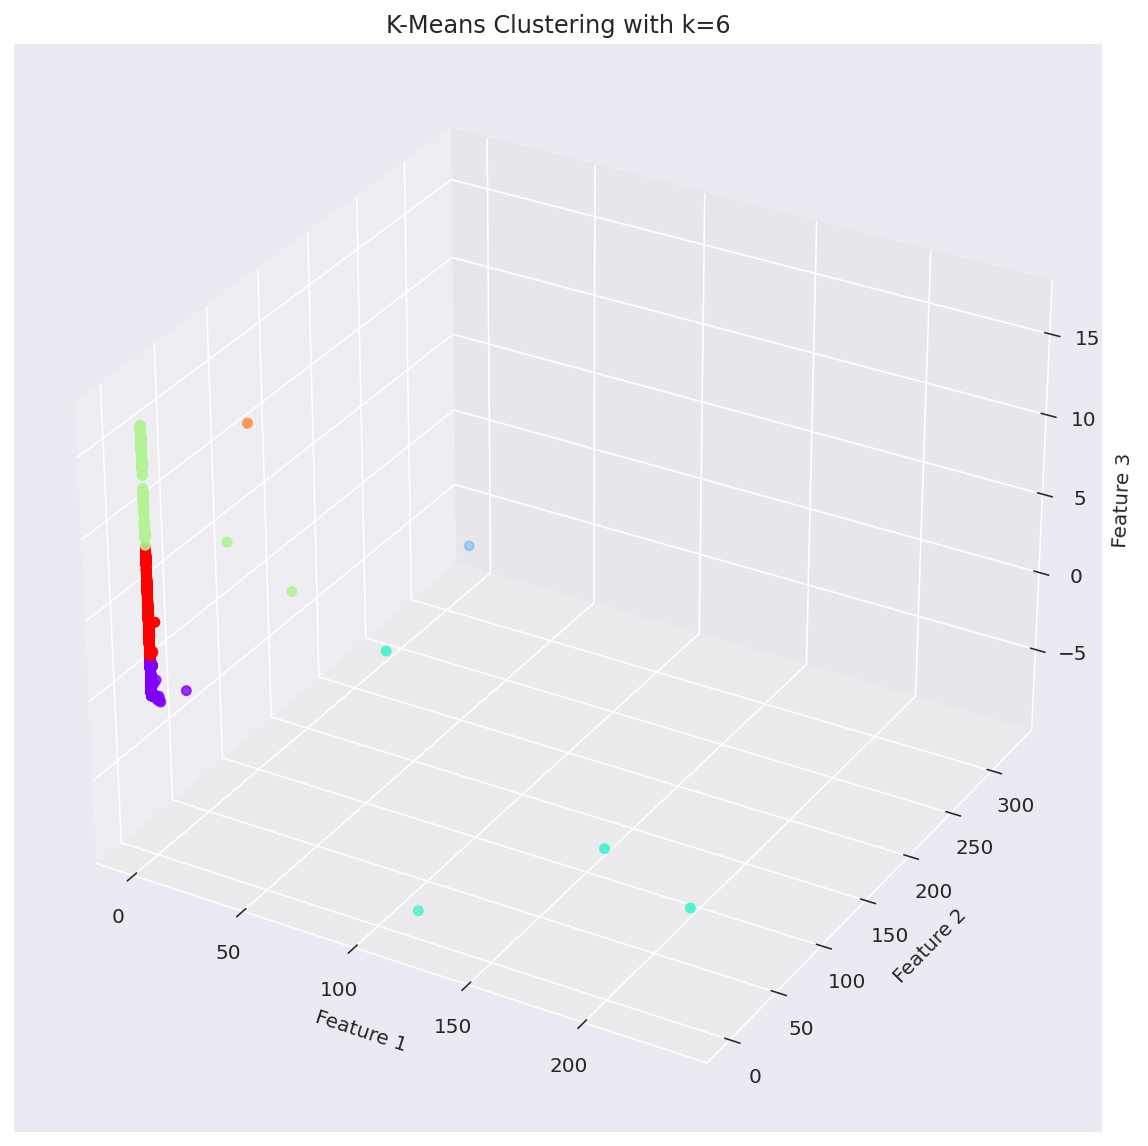

In [132]:
# Apply K-means clustering with k=6
kmeans = KMeans(n_clusters=6, random_state=0)
labels = kmeans.fit_predict(scaled_data)

# Visualize the clusters with a scatter plot of three features
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c=labels, cmap='rainbow')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('K-Means Clustering with k=6')

# Save the graph
plt.savefig('kmeans_cluster_2.png')

plt.show()